In [2]:
#importando as bibliotecas necessarias
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#importando o arquivo como dataframe
df = pd.read_excel("2018_all_indicators.xlsx", encoding="windows-1252")
df.head()

dimension  indicator_id indicator_name iso3 country_name  1990  \
0  Composite indices        146206       HDI rank  AFG  Afghanistan   NaN   
1  Composite indices        146206       HDI rank  ALB      Albania   NaN   
2  Composite indices        146206       HDI rank  DZA      Algeria   NaN   
3  Composite indices        146206       HDI rank  AND      Andorra   NaN   
4  Composite indices        146206       HDI rank  AGO       Angola   NaN   

   1991  1992  1993  1994  ...  2009  2010  2011  2012  2013  2014  2015  \
0   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

    2016   2017  9999  
0  168.0  168.0   NaN  
1   69.0   68.0   NaN  
2   83.0   85.0   NaN  
3   35.0   35.0   NaN  
4  145.0  147.0   NaN  

[5 rows x 34 columns]

In [4]:
#como será trabalhado os arquivos até 2018, será utilizado um intervalo de 2010-2018
colunas_desnecessarias = ["indicator_id","iso3", 1990,1991, 1992, 1993,1994, 1995, 1996, 1997,1998, 1999, 2000,
                           2001,2002, 2003, 2004,2005, 2006, 2007, 2008, 9999]
for coluna in colunas_desnecessarias:
    del df[coluna]
df.head()

dimension indicator_name country_name  2009  2010  2011  2012  \
0  Composite indices       HDI rank  Afghanistan   NaN   NaN   NaN   NaN   
1  Composite indices       HDI rank      Albania   NaN   NaN   NaN   NaN   
2  Composite indices       HDI rank      Algeria   NaN   NaN   NaN   NaN   
3  Composite indices       HDI rank      Andorra   NaN   NaN   NaN   NaN   
4  Composite indices       HDI rank       Angola   NaN   NaN   NaN   NaN   

   2013  2014  2015   2016   2017  
0   NaN   NaN   NaN  168.0  168.0  
1   NaN   NaN   NaN   69.0   68.0  
2   NaN   NaN   NaN   83.0   85.0  
3   NaN   NaN   NaN   35.0   35.0  
4   NaN   NaN   NaN  145.0  147.0

In [5]:
df2 = df.copy(deep=True)
df2.head()

dimension indicator_name country_name  2009  2010  2011  2012  \
0  Composite indices       HDI rank  Afghanistan   NaN   NaN   NaN   NaN   
1  Composite indices       HDI rank      Albania   NaN   NaN   NaN   NaN   
2  Composite indices       HDI rank      Algeria   NaN   NaN   NaN   NaN   
3  Composite indices       HDI rank      Andorra   NaN   NaN   NaN   NaN   
4  Composite indices       HDI rank       Angola   NaN   NaN   NaN   NaN   

   2013  2014  2015   2016   2017  
0   NaN   NaN   NaN  168.0  168.0  
1   NaN   NaN   NaN   69.0   68.0  
2   NaN   NaN   NaN   83.0   85.0  
3   NaN   NaN   NaN   35.0   35.0  
4   NaN   NaN   NaN  145.0  147.0

In [6]:
#para comparar os dados entre si, será utilizado um scatter plot que pega duas categorias e traça o gráfico por ano
#primeiramente, será criado uma função para separar as tabelas por categoria
def tabelar_por_categoria(tabela, categoria):
    return tabela.loc[tabela["indicator_name"] == categoria]
#depois uma função para separar os anos necessários
def tabelar_por_ano(tabela, ano):
    categorias = ["indicator_name", "country_name"] + ano
    return tabela[categorias]
#deletar várias categorias de um dataframe
def deletar(tabela, categorias):
    for categoria in categorias:
        del tabela[categoria]
    return tabela

tabel = tabelar_por_categoria(df2, "Youth not in school or employment (% ages 15-24)")  
tabel = tabelar_por_ano(tabel, [2014, 2015, 2016])

In [198]:
#com essas duas funções, é possivel agora separar as tabelas por categoria e ano
#checando todas as categorias de indicator_name

df2["indicator_name"].unique()

array(['HDI rank', 'Human Development Index (HDI)', 'Median age (years)',
       'Old-age (65 and older) dependency ratio (per 100 people ages 15-64)',
       'Population ages 15–64 (millions)',
       'Population ages 65 and older (millions)',
       'Population under age 5 (millions)',
       'Sex ratio at birth (male to female births)',
       'Total population (millions)', 'Urban population (%)',
       'Young age (0-14) dependency ratio (per 100 people ages 15-64)',
       'Education index', 'Expected years of schooling (years)',
       'Expected years of schooling, female (years)',
       'Expected years of schooling, male (years)',
       'Government expenditure on education (% of GDP)',
       'Gross enrolment ratio, pre-primary (% of preschool-age children)',
       'Gross enrolment ratio, primary (% of primary school-age population)',
       'Gross enrolment ratio, secondary (% of secondary school-age population)',
       'Gross enrolment ratio, tertiary (% of tertiary school

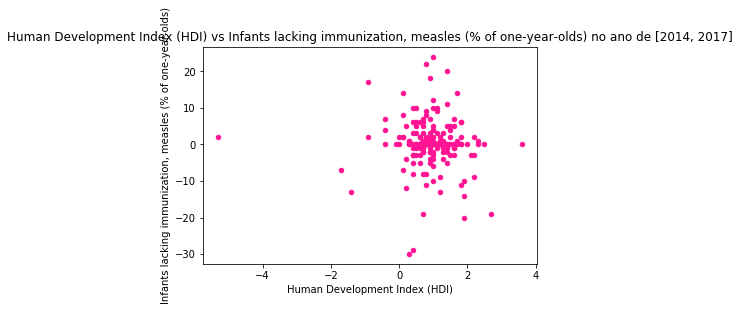

In [9]:
#criando uma função para traçar um scatter plot baseado em duas categorias e o ano
def tracar_scatter_plot(tabela, categoriax, categoriay, ano):
    #criando as tabelas x e y
    tabelax = tabelar_por_categoria(tabela, categoriax)
    tabelax = tabelar_por_ano(tabelax,ano)
    tabelay = tabelar_por_categoria(tabela, categoriay)
    tabelay = tabelar_por_ano(tabelay,ano)
    #juntando elas em uma tabela só
    tabelaf = pd.merge(tabelax, tabelay, left_on='country_name', right_on='country_name', how='left')
    if len(ano) == 2:
        #calculando a diferença entre os anos para melhor plotagem dos gráficos
        tabelaf = calcular_diferenca(tabelaf,[categoriax, categoriay], ano)
    elif len(ano) == 1:
        tabelaf = deletar(tabelaf, ["indicator_name_x", "indicator_name_y"])
        tabelaf = tabelaf.rename(columns = {str(ano[0]) + "_x": categoriax, str(ano[0]) + "_y": categoriay})
    #plotando o gráfico
    if not tabelaf.isna().all().any():
        fig, ax = plt.subplots()
        tabelaf.plot.scatter(categoriax, categoriay, c="deeppink", ax=ax)
        ax.set_title(categoriax +" vs "+ categoriay +" no ano de "+ str(ano))
        plt.show()
    return tabelaf
    
#criar novas colunas em um dataframe, calculando a diferenca entre anos e renomeando a coluna para o indicador
def calcular_diferenca(tabela, categorias, anos):
    tabela["x"] = (tabela[str(anos[1]) + "_x"] - tabela[str(anos[0]) + "_x"])*100
    tabela["y"] = (tabela[str(anos[1]) + "_y"] - tabela[str(anos[0]) + "_y"] )
    tabela = deletar(tabela, ["indicator_name_x", "indicator_name_y"])
    tabela = tabela.rename(columns = {'x': categorias[0], 'y': categorias[1]})
    return tabela

tabel = tracar_scatter_plot(df2, 'Human Development Index (HDI)',
       'Infants lacking immunization, measles (% of one-year-olds)', [2014 ,2017])
#tabel.head

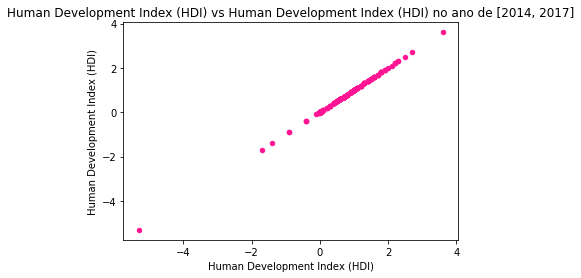

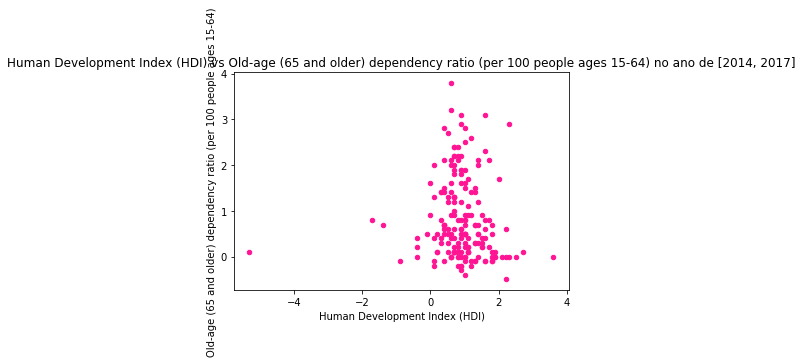

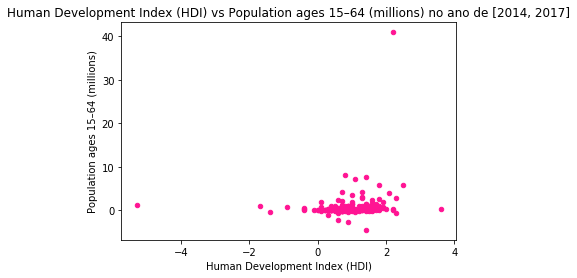

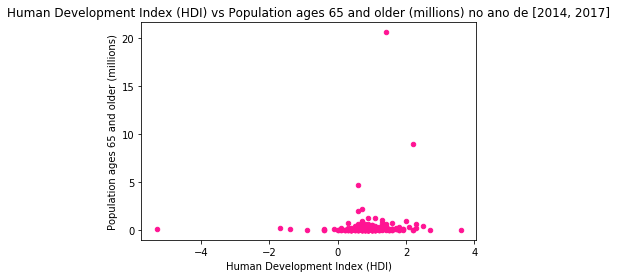

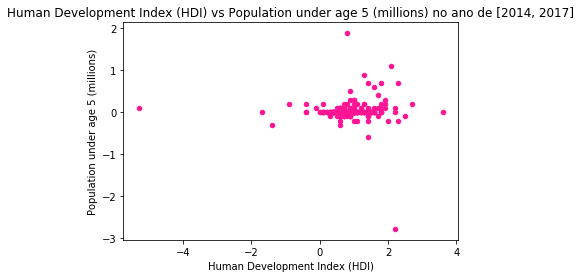

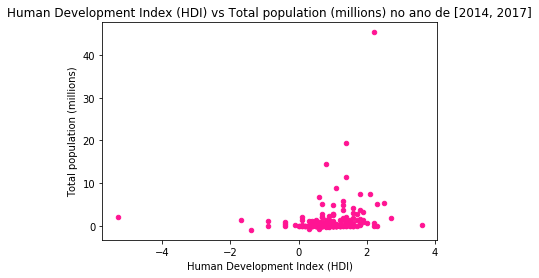

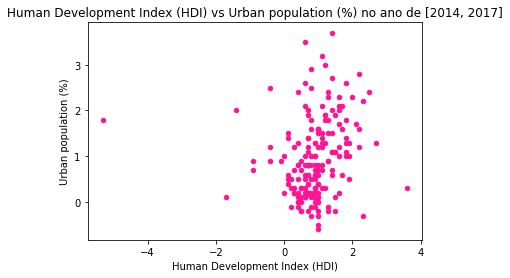

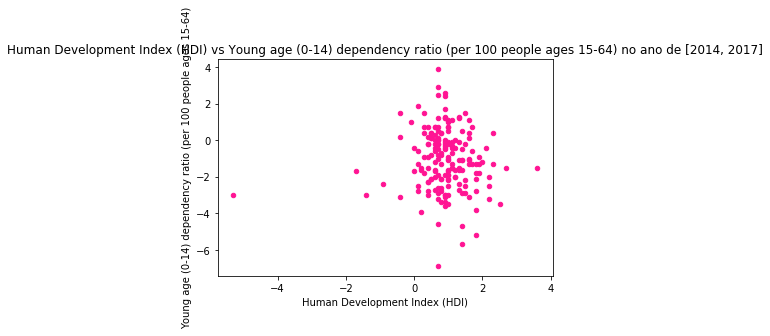

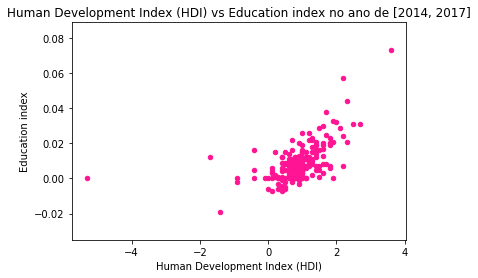

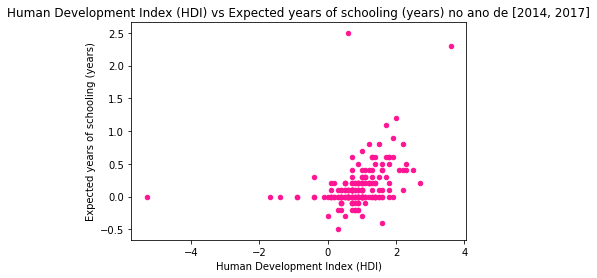

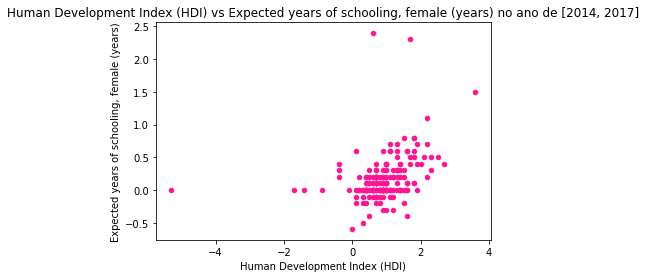

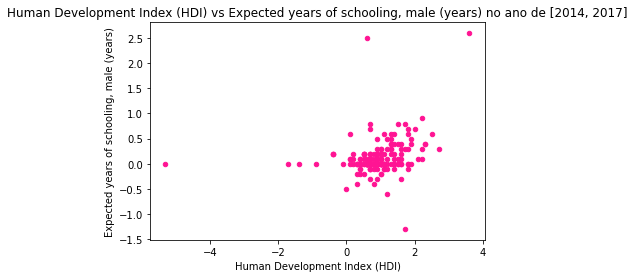

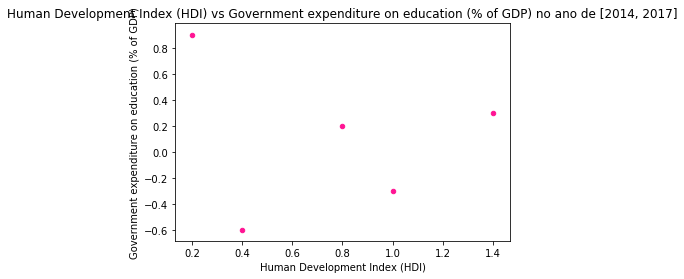

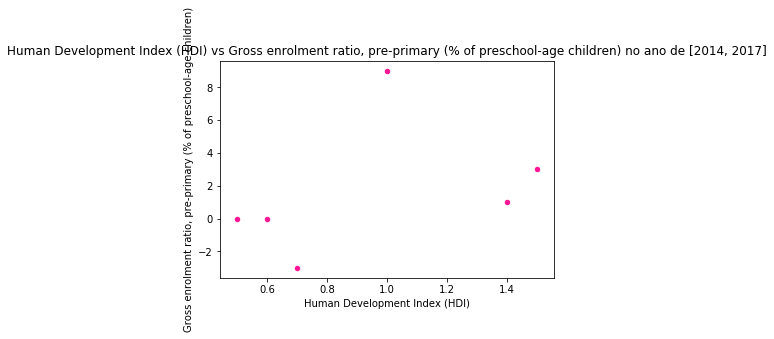

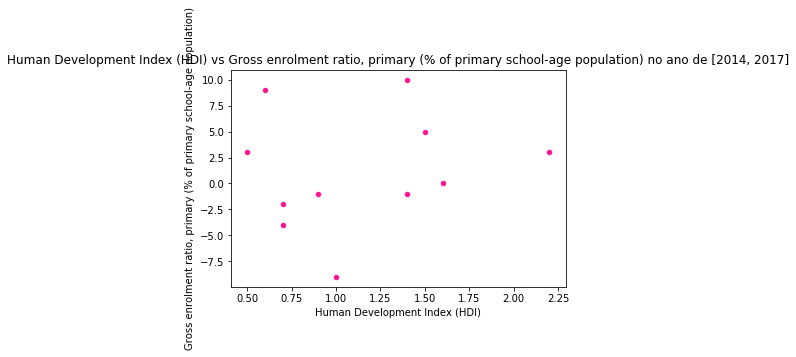

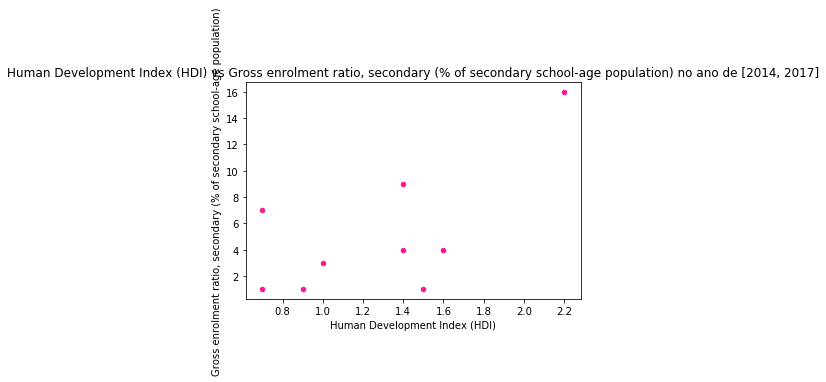

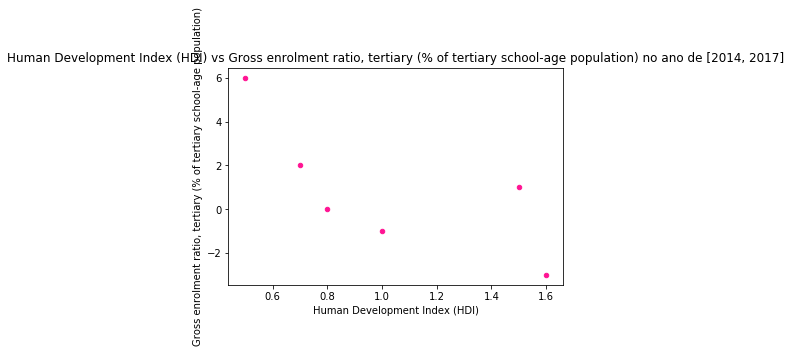

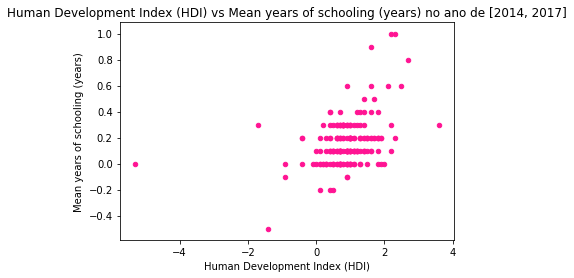

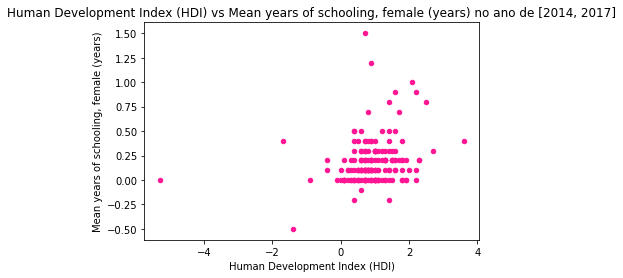

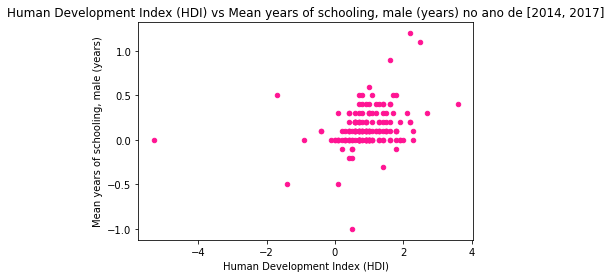

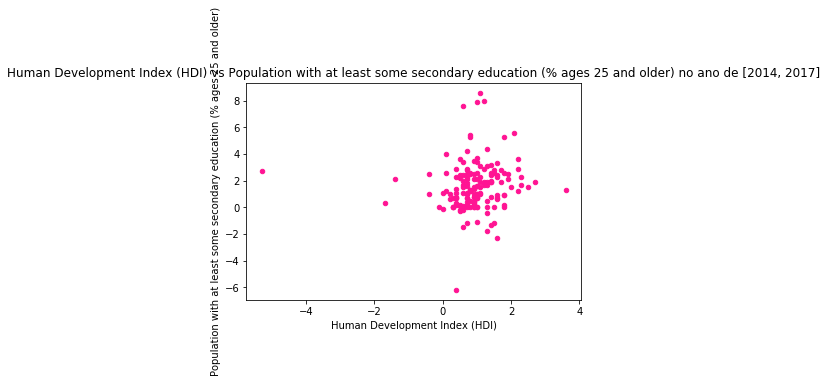

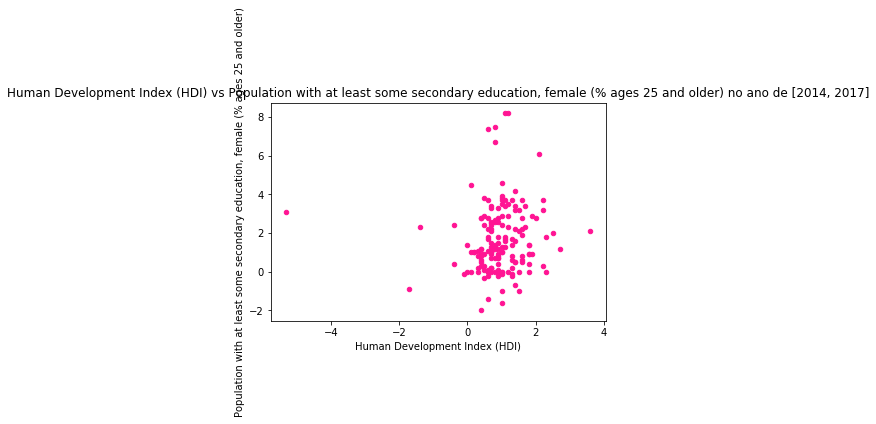

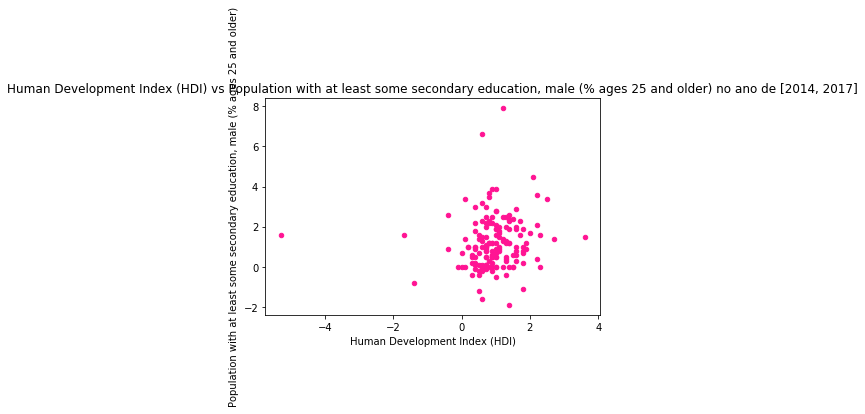

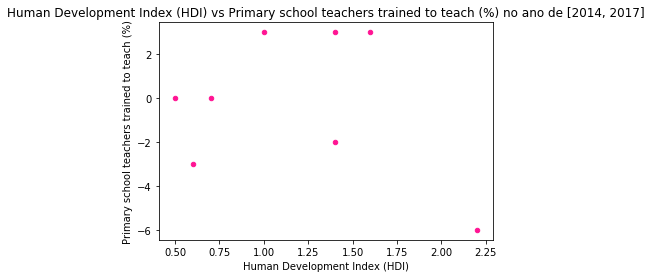

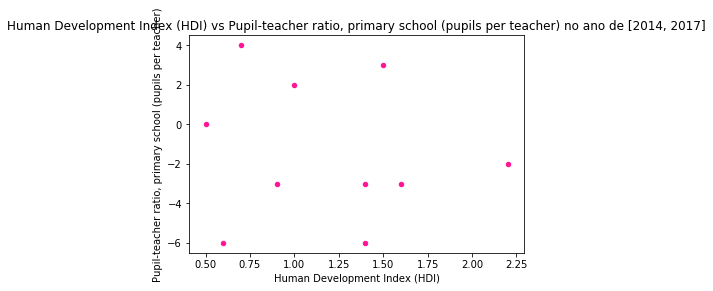

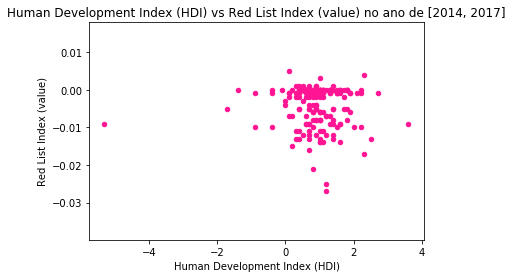

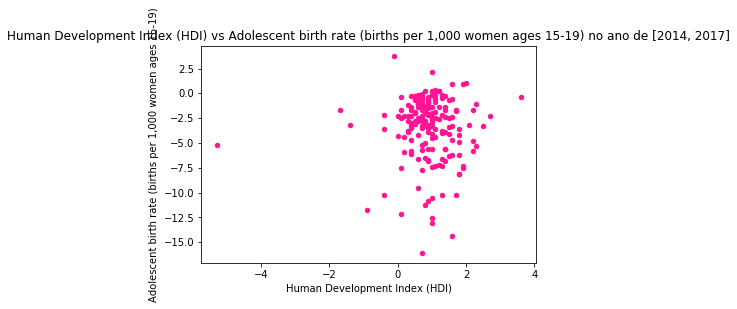

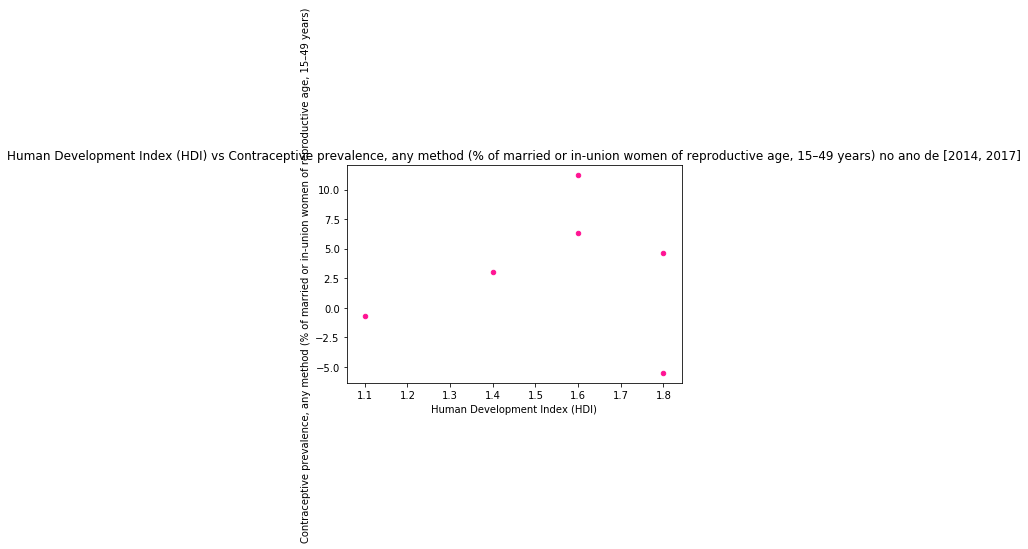

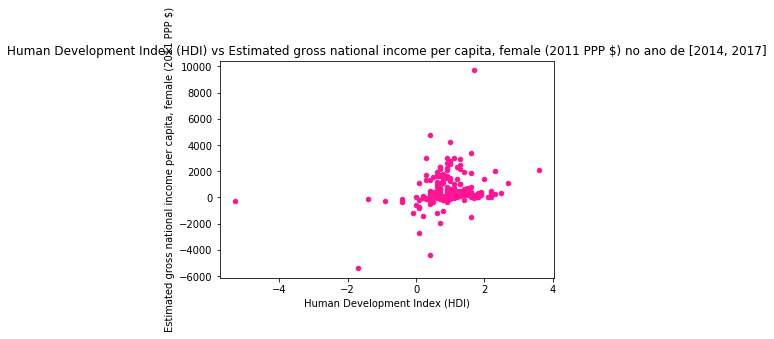

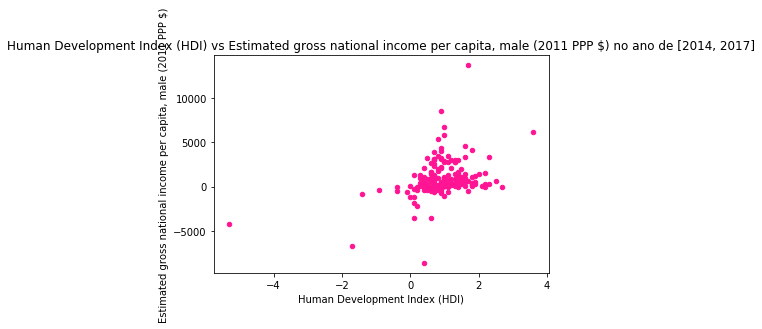

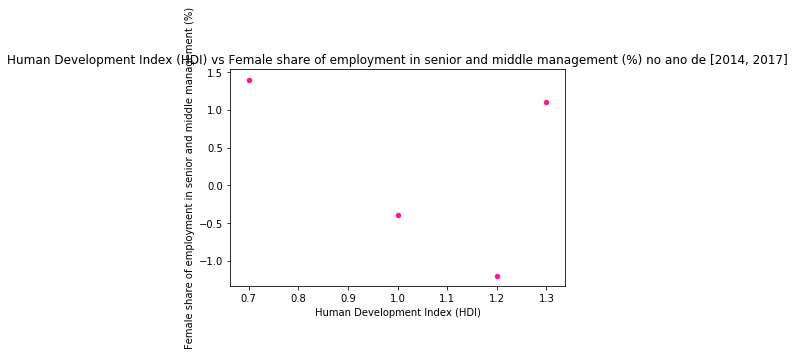

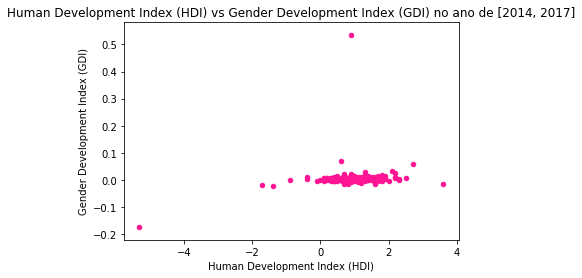

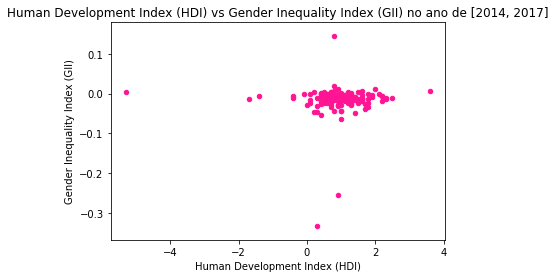

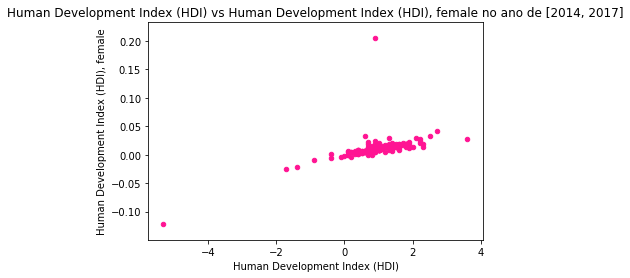

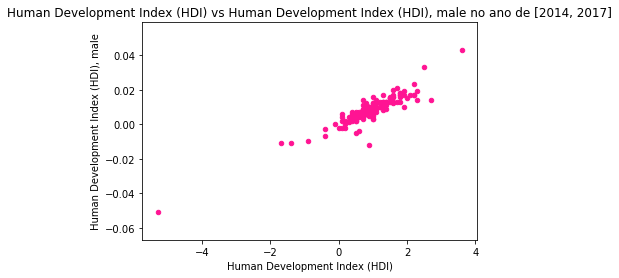

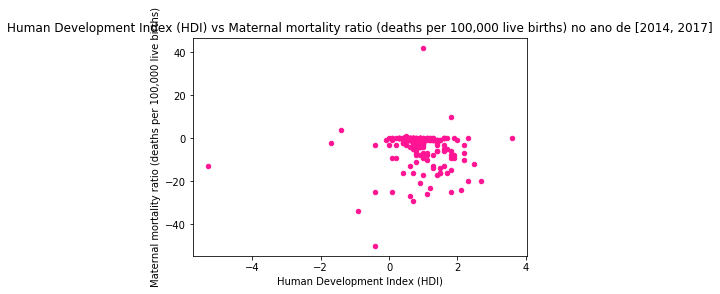

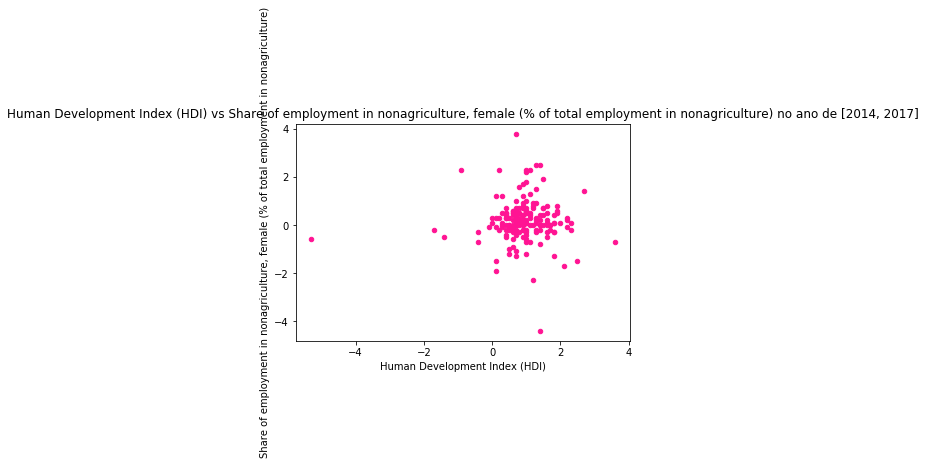

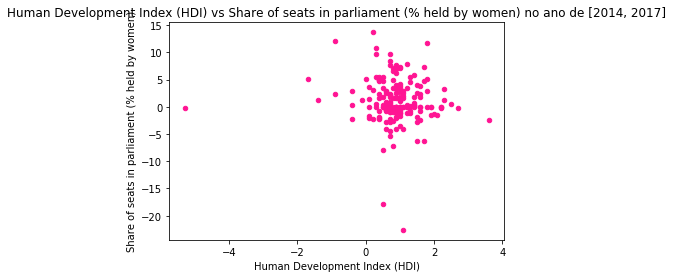

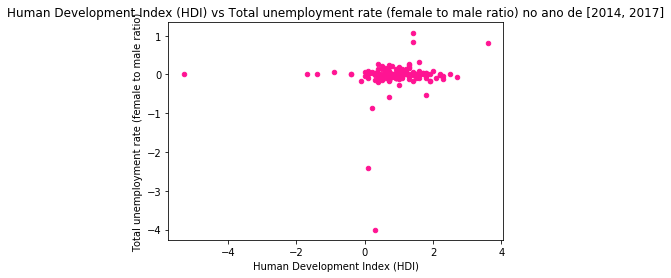

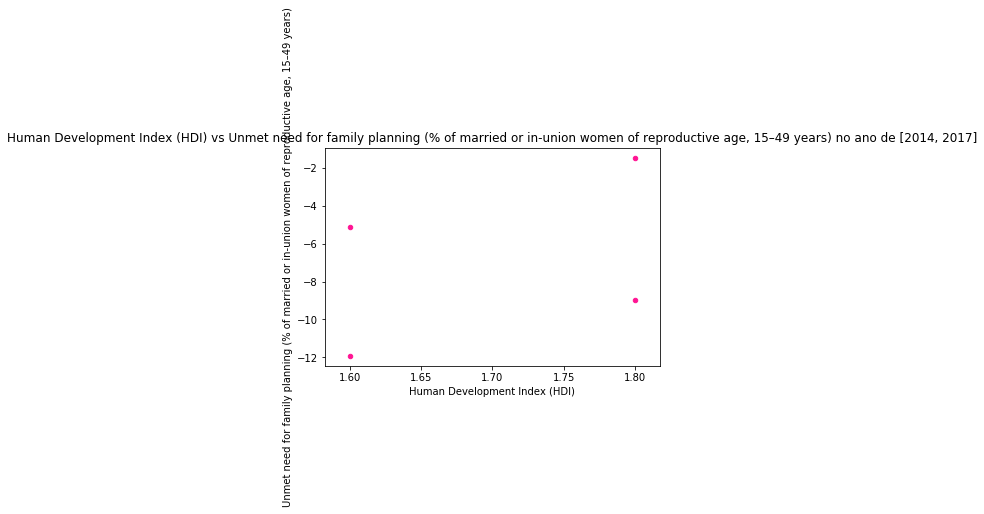

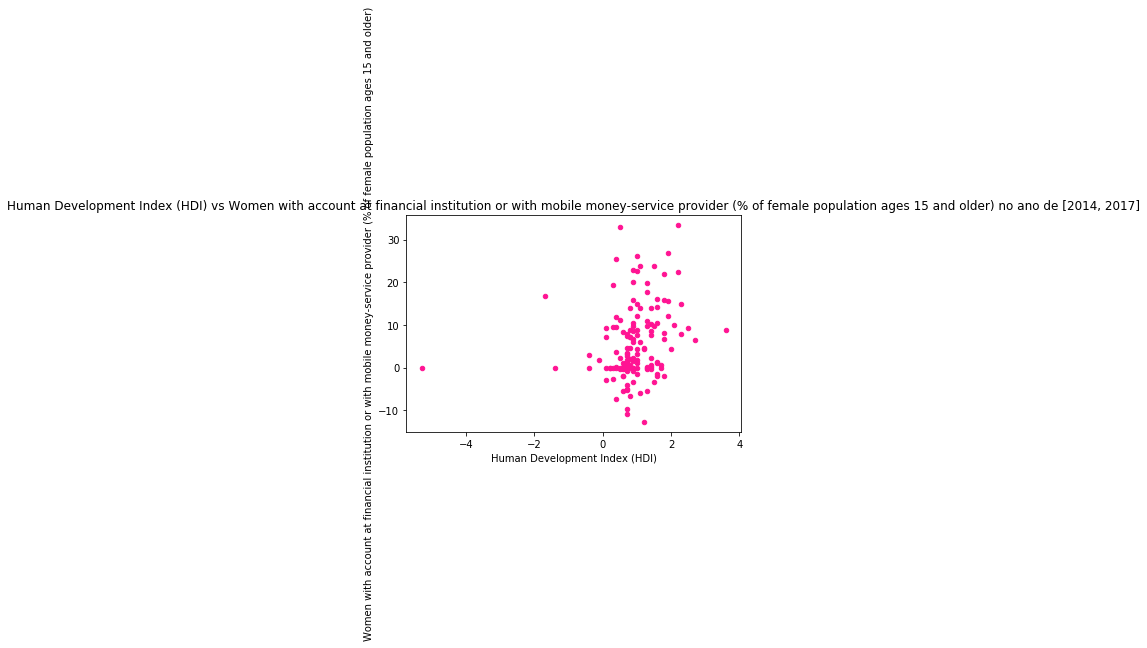

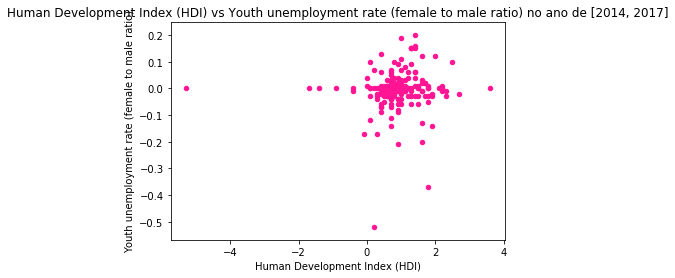

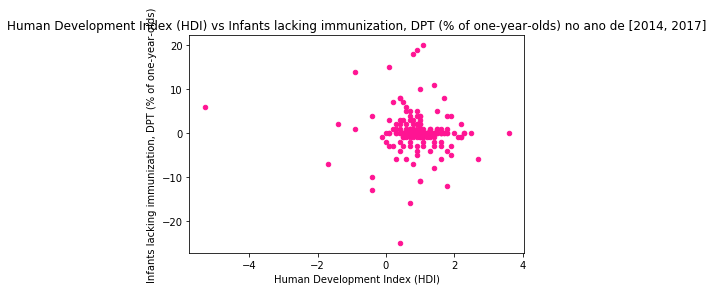

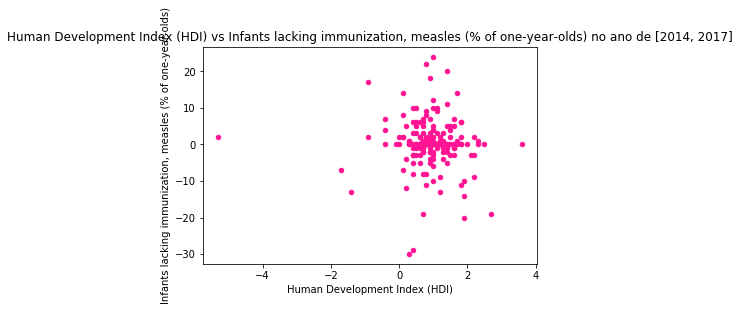

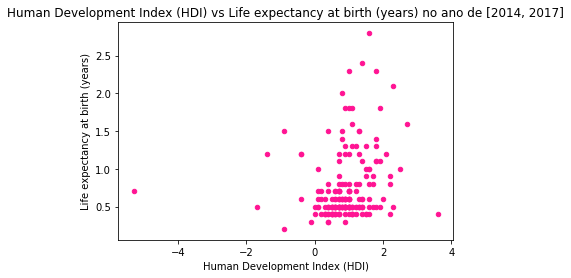

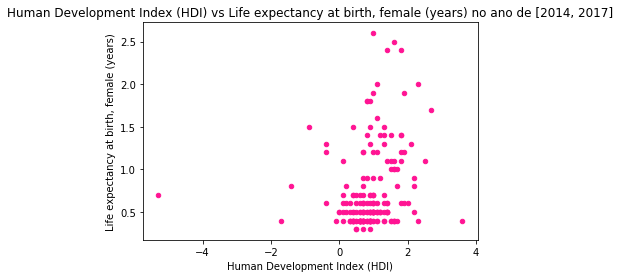

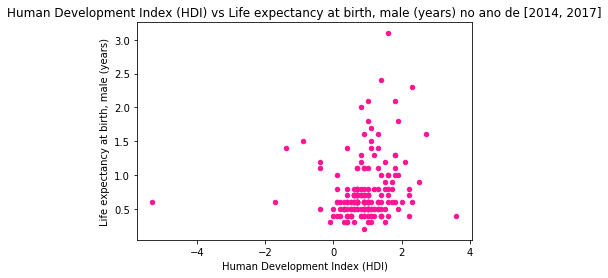

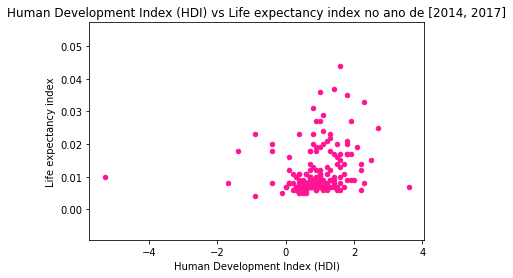

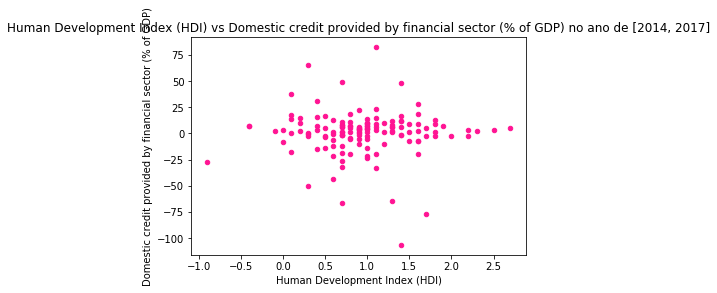

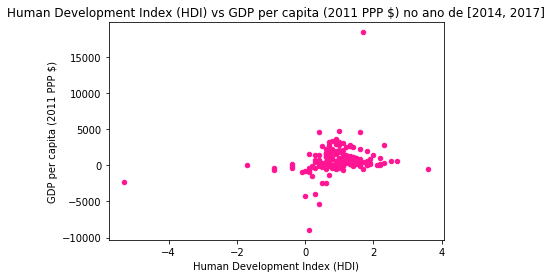

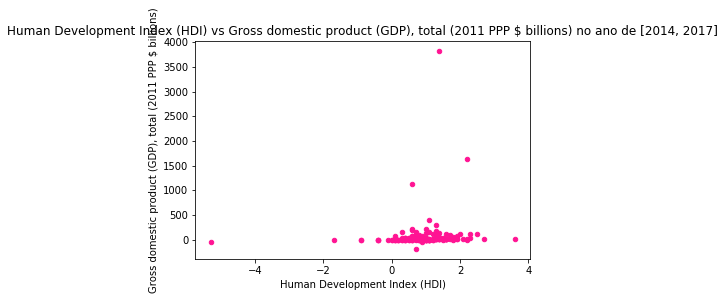

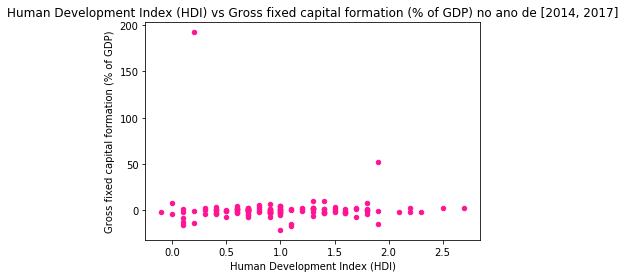

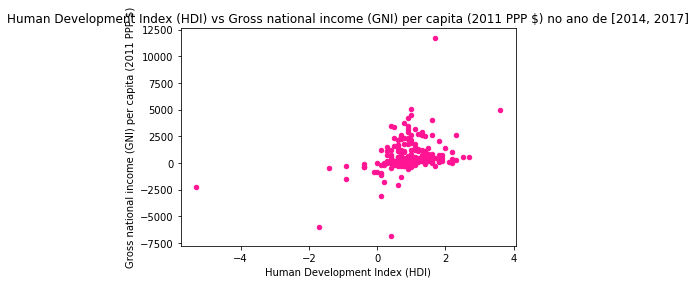

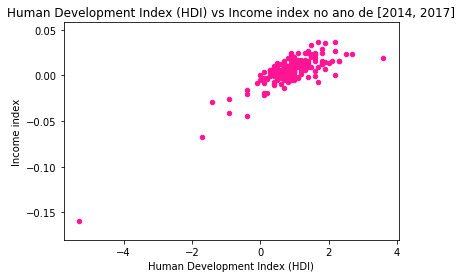

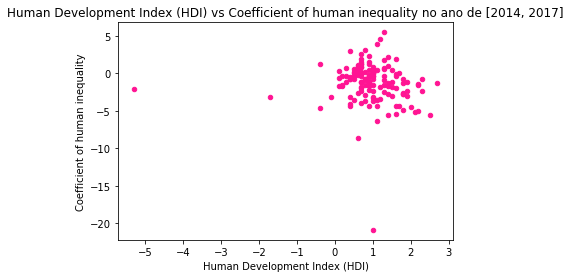

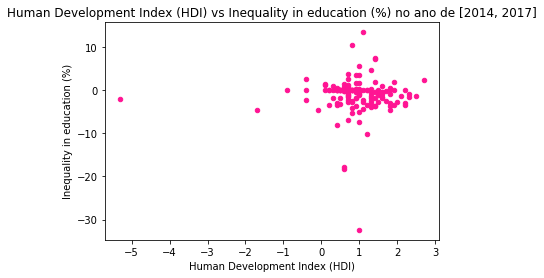

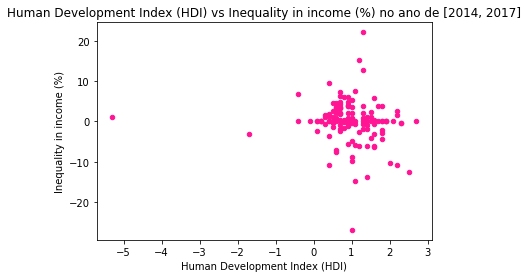

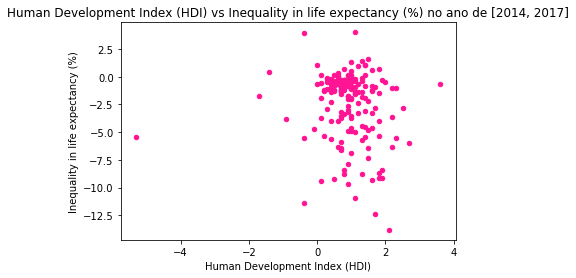

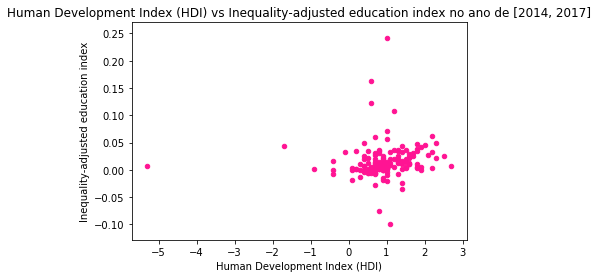

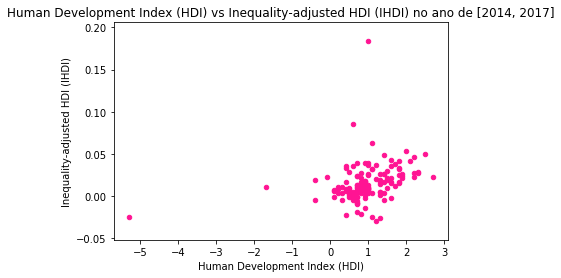

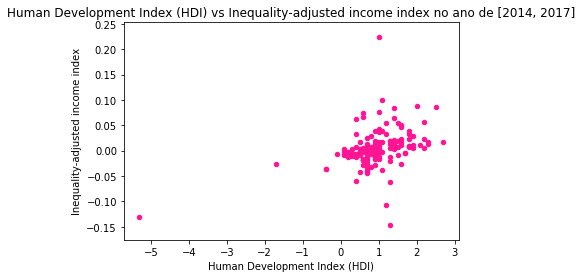

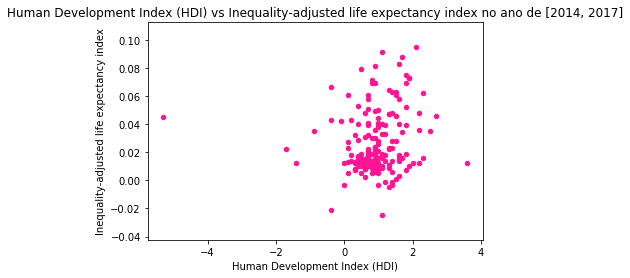

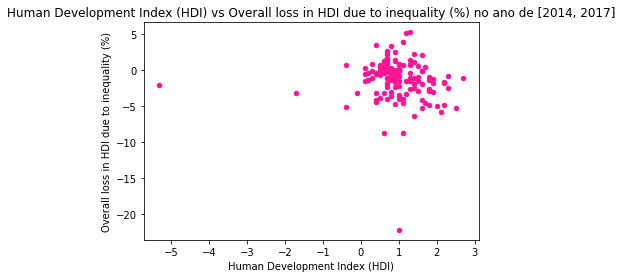

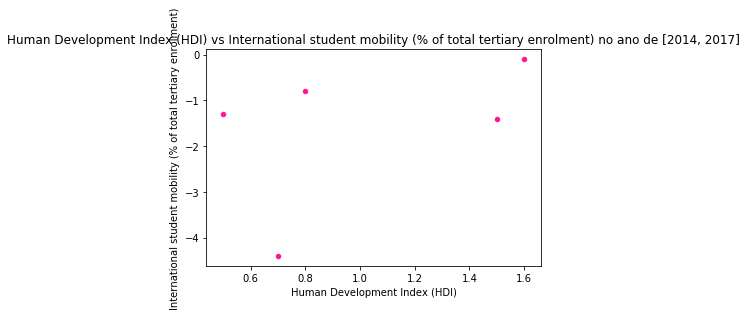

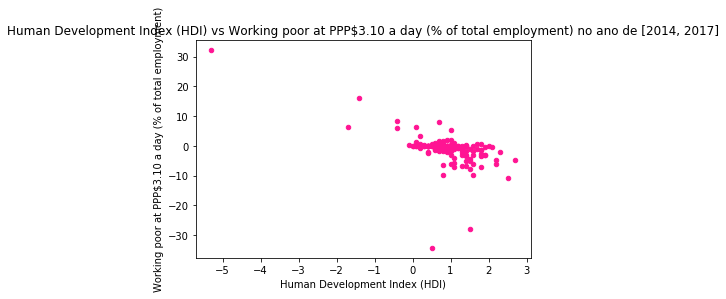

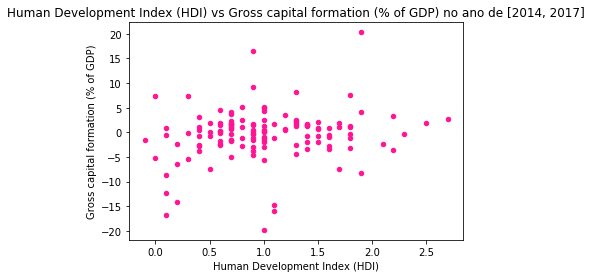

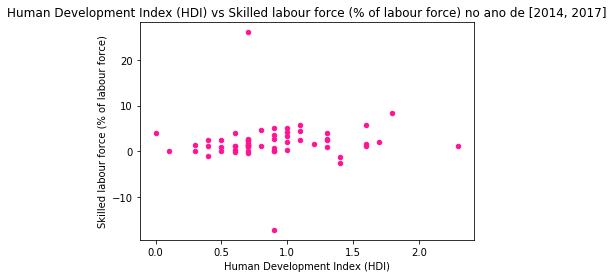

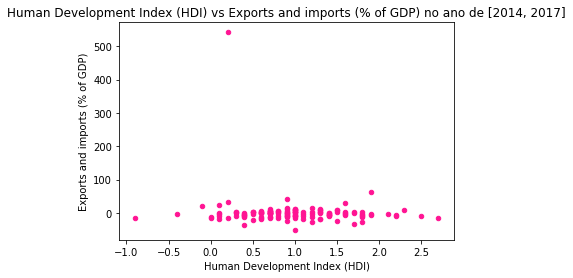

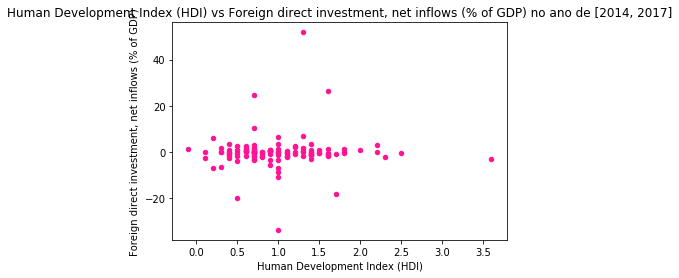

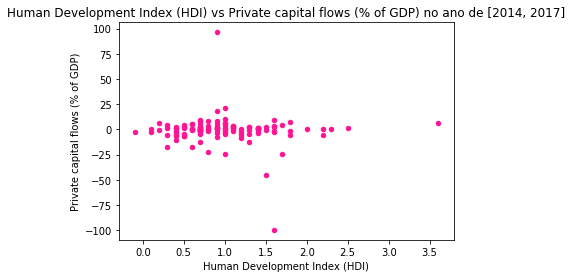

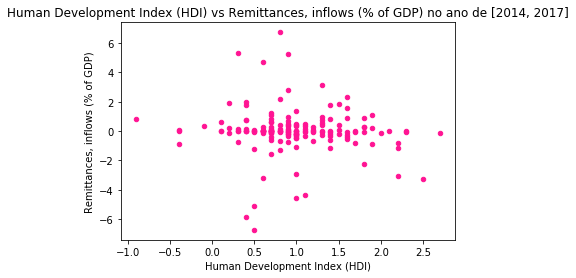

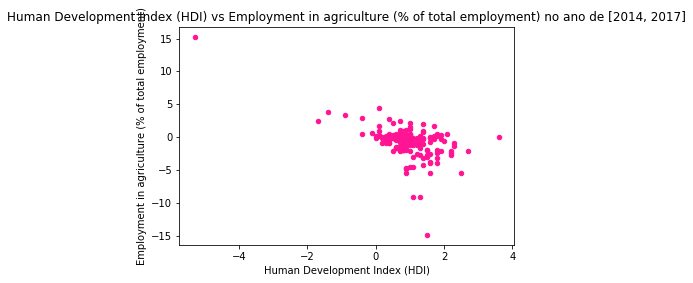

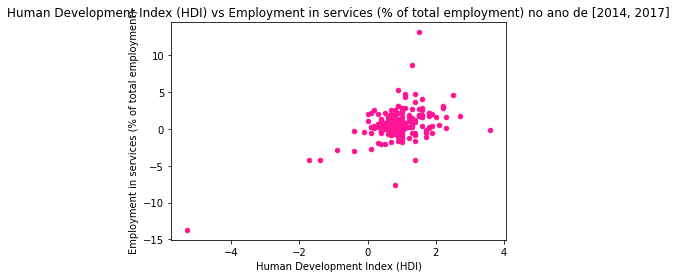

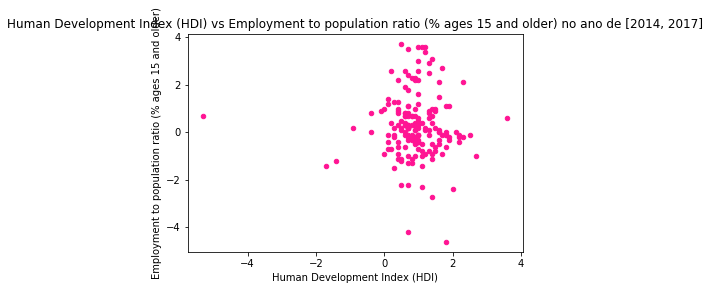

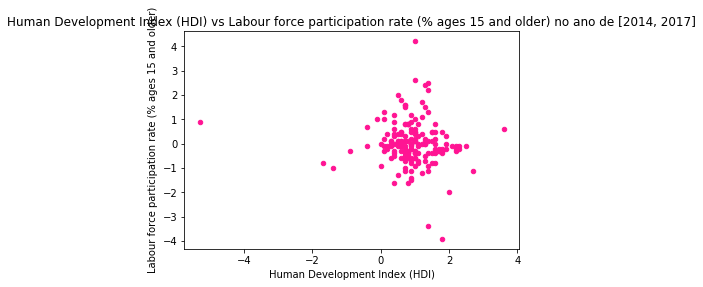

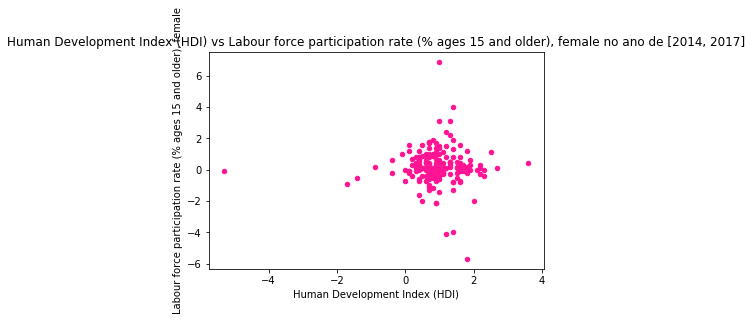

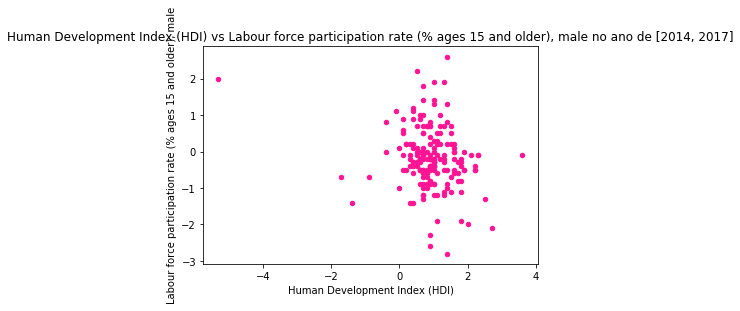

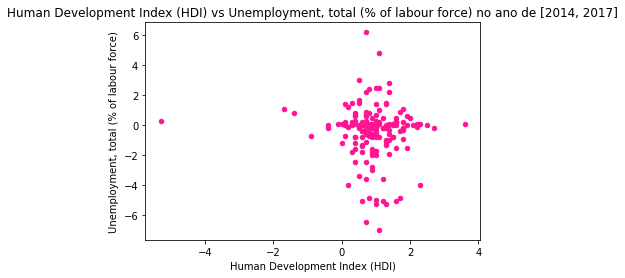

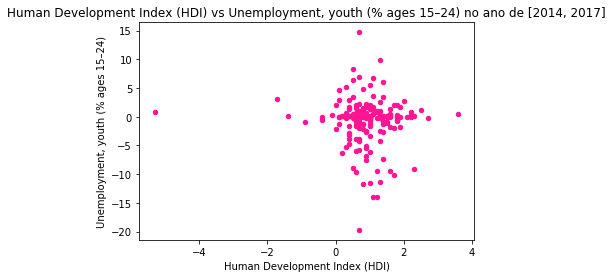

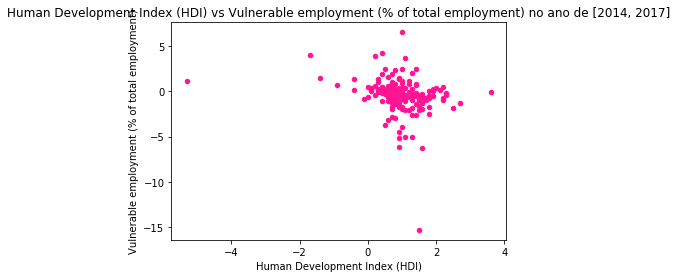

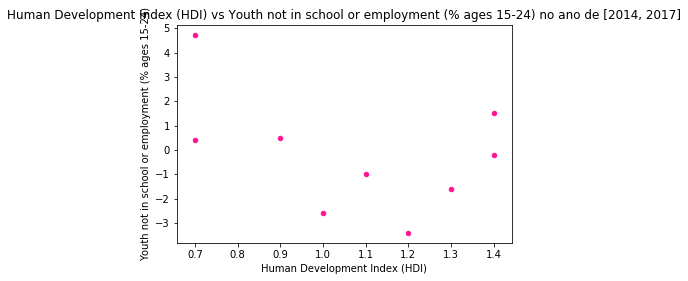

In [10]:
#agora será comparado uma categoria com todas as outras para detectar semelhanças
for categoria in df2['indicator_name'].unique():
    tabel = tracar_scatter_plot(df2, 'Human Development Index (HDI)',
       categoria, [2014 ,2017])


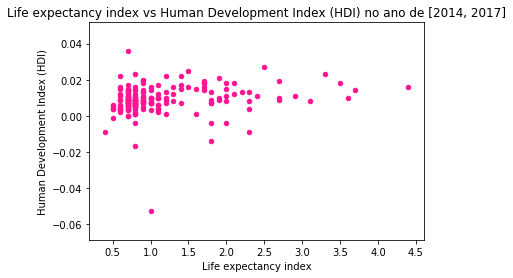

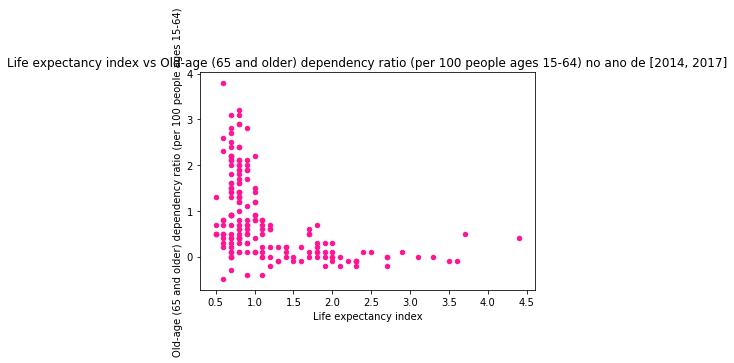

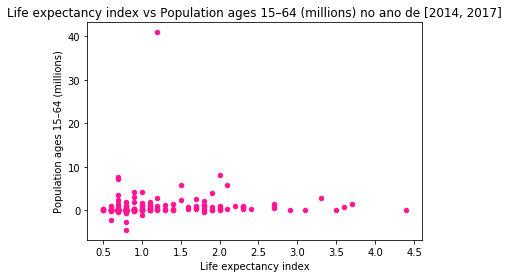

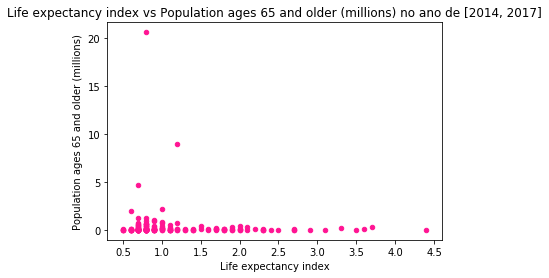

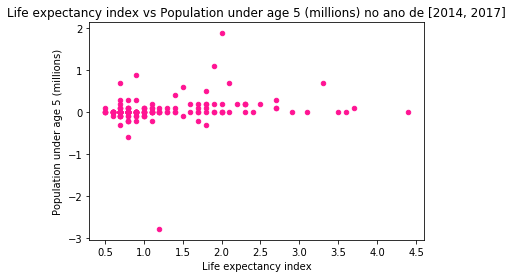

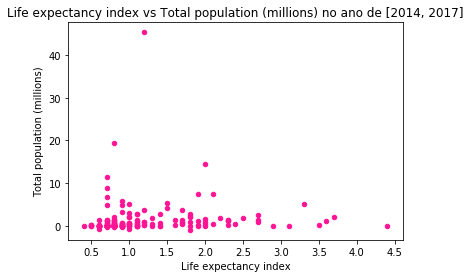

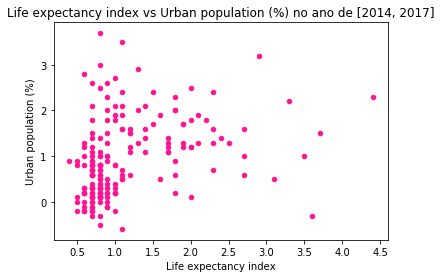

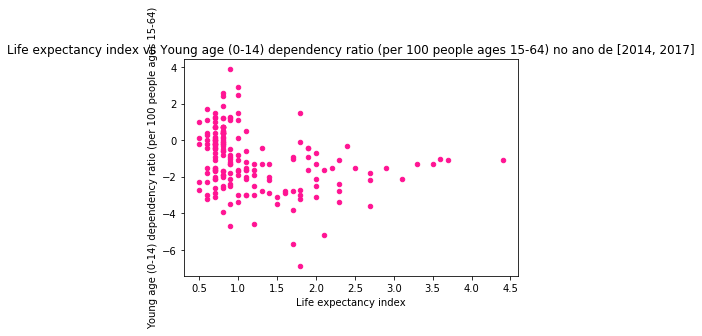

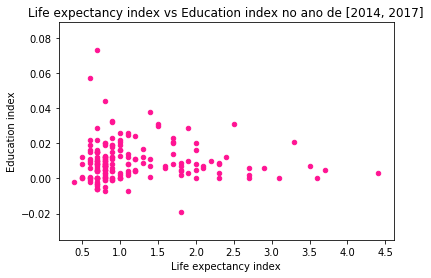

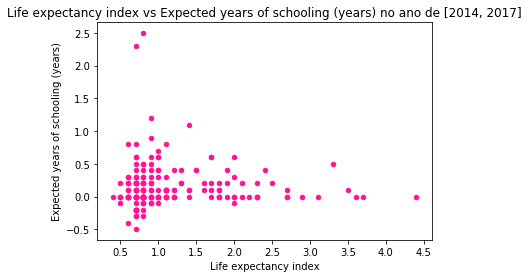

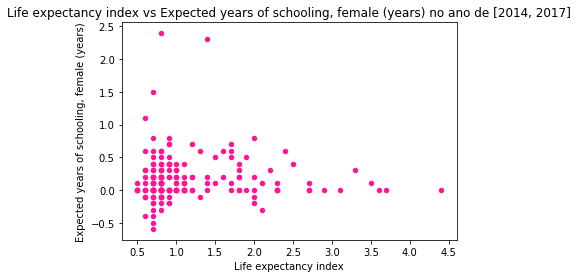

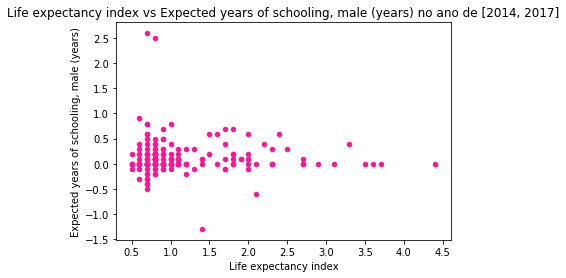

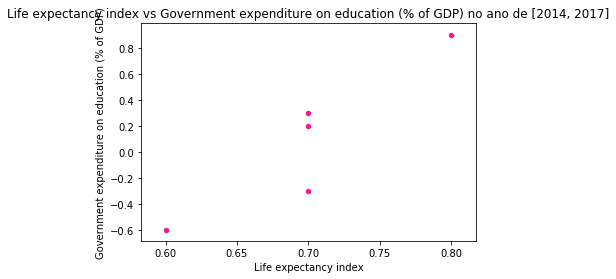

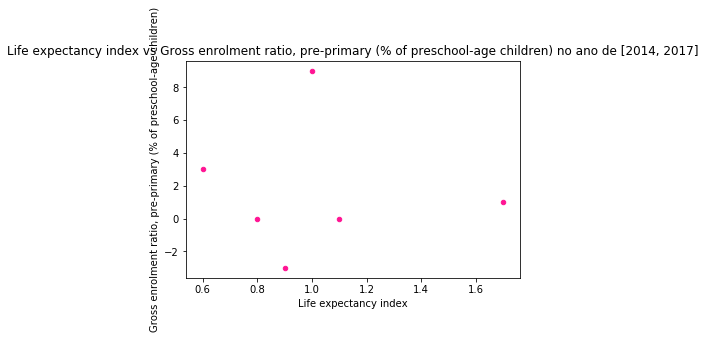

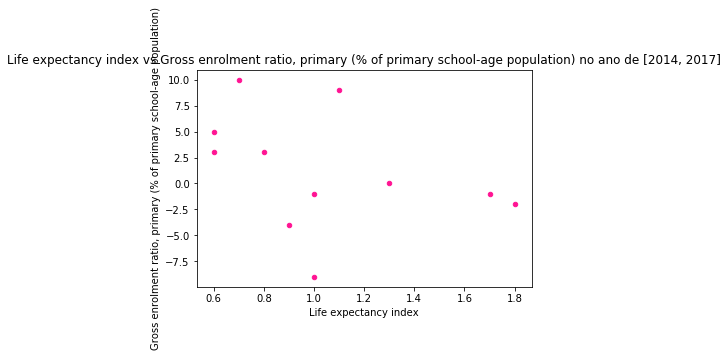

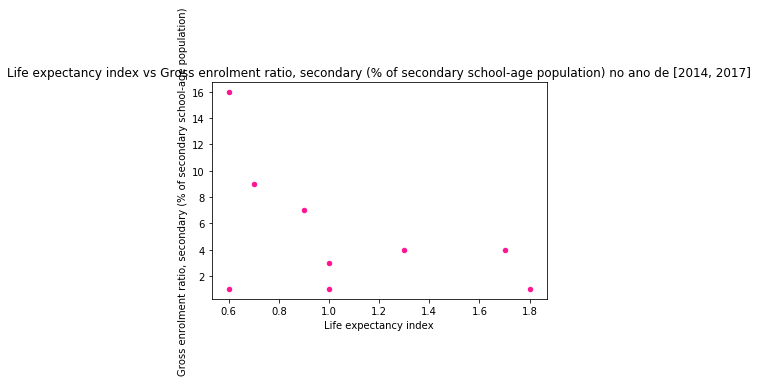

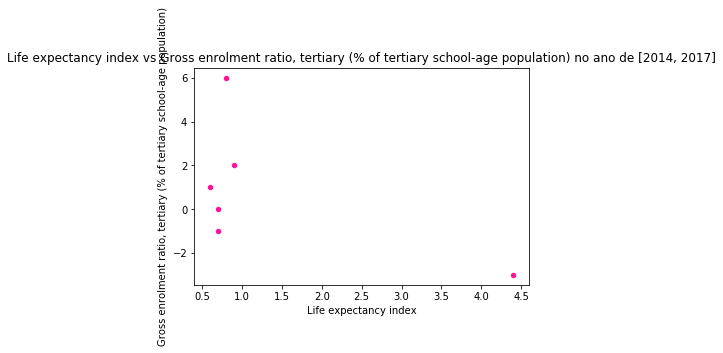

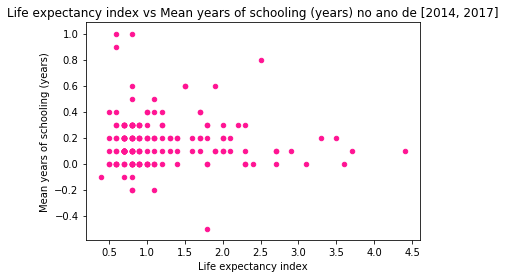

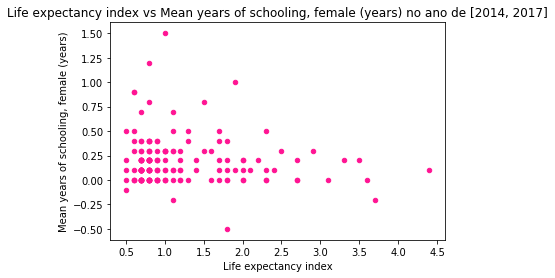

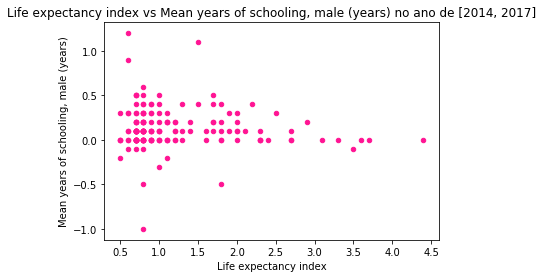

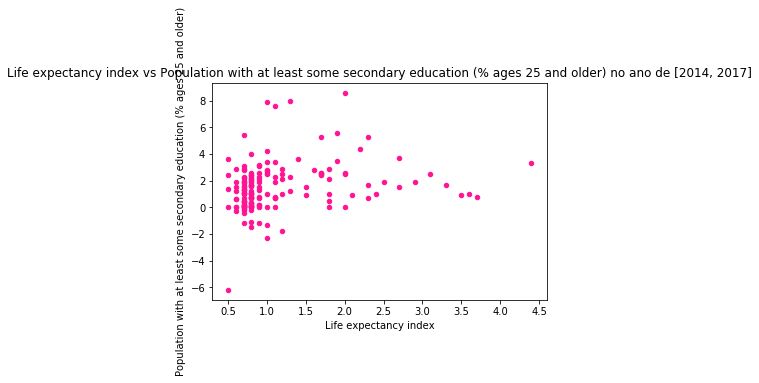

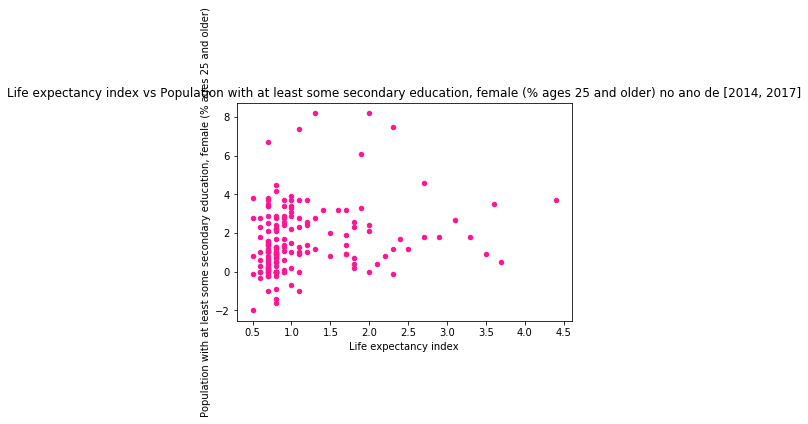

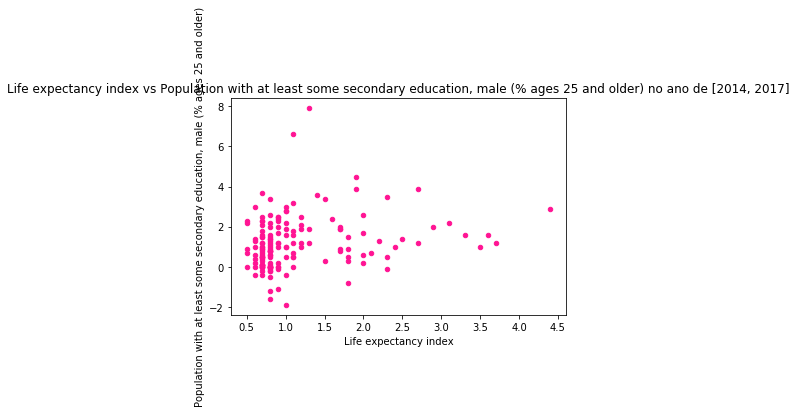

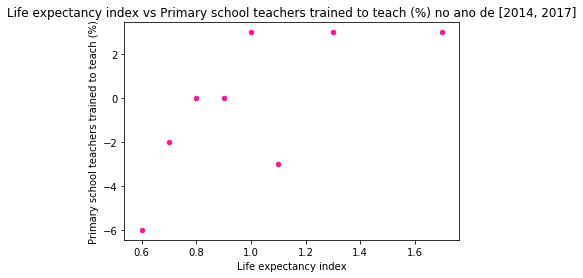

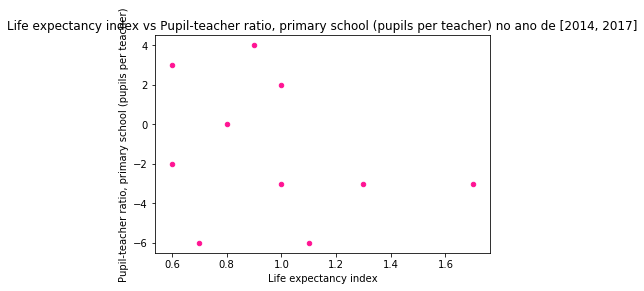

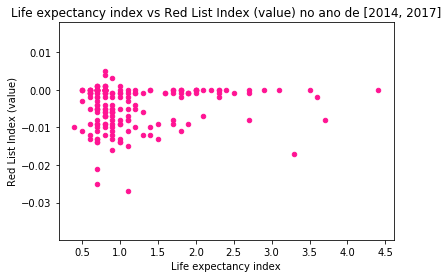

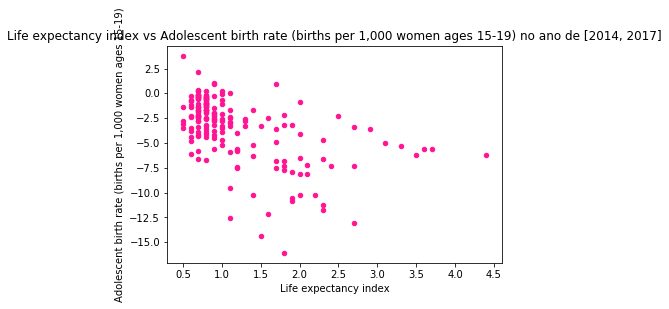

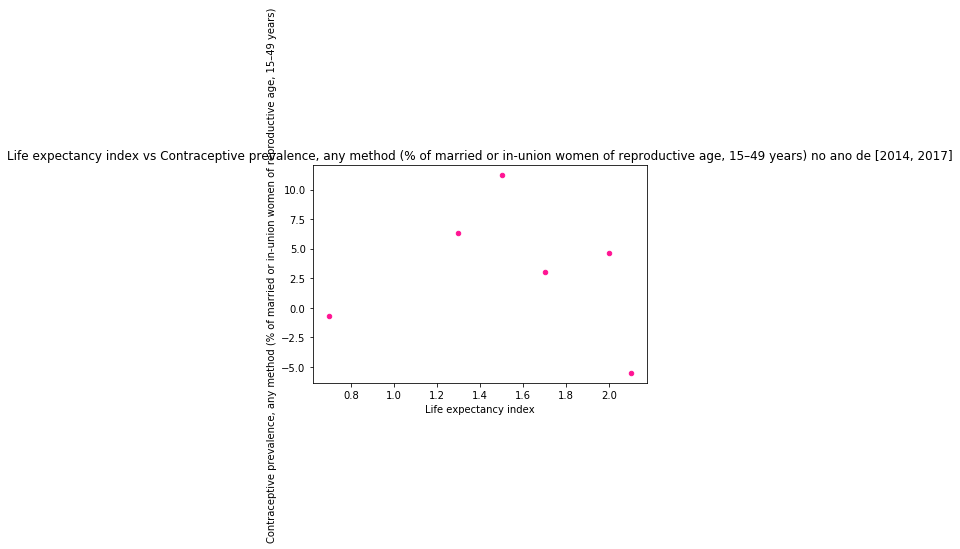

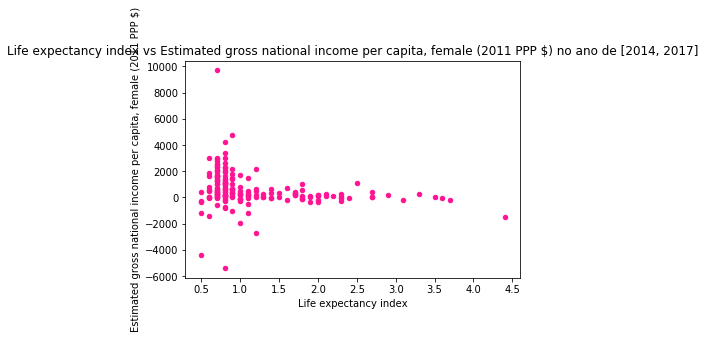

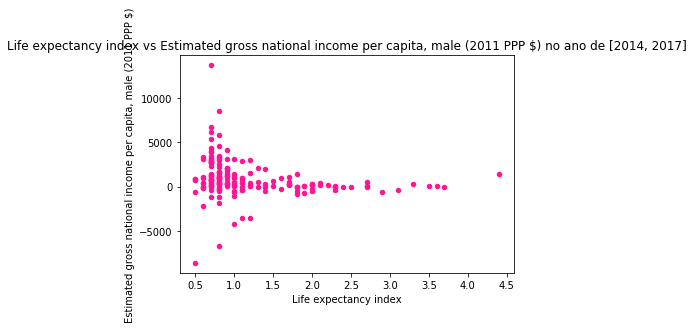

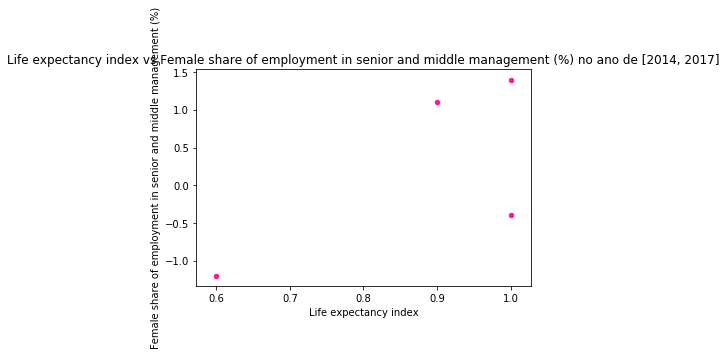

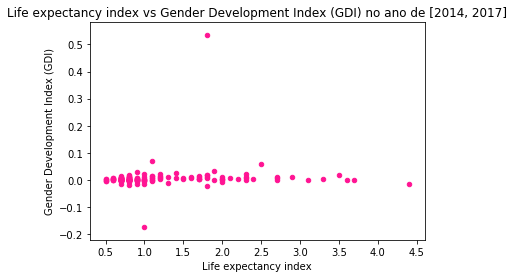

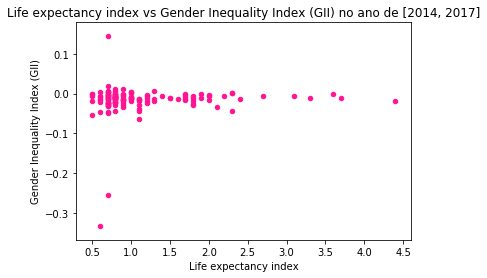

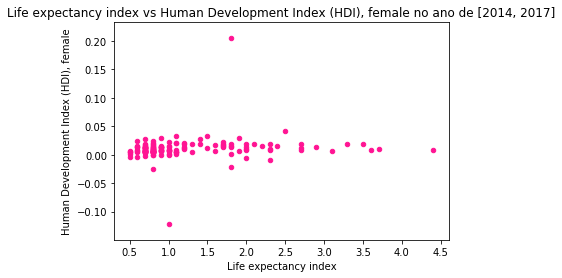

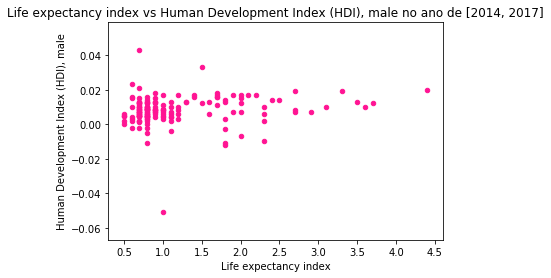

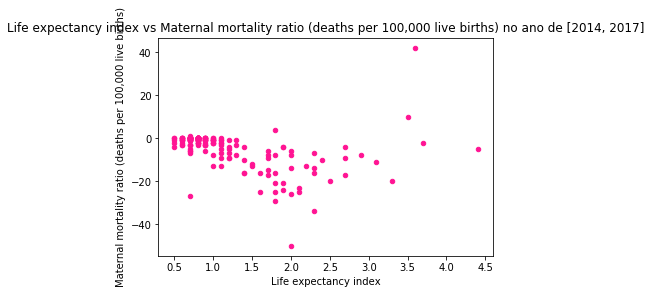

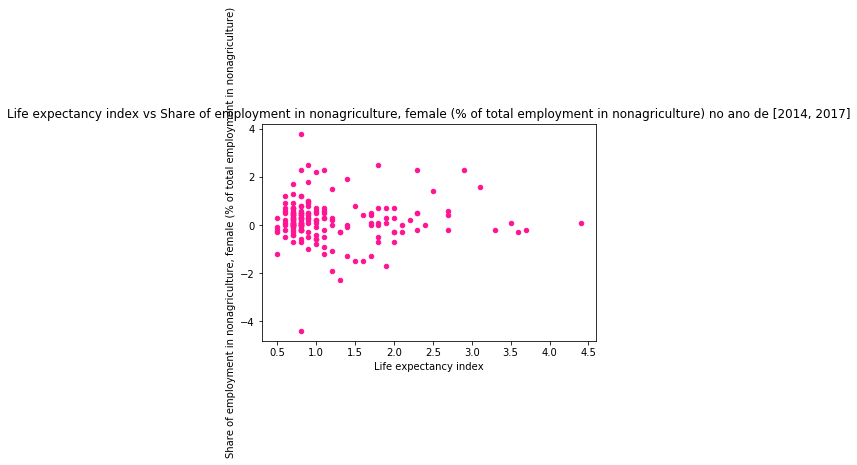

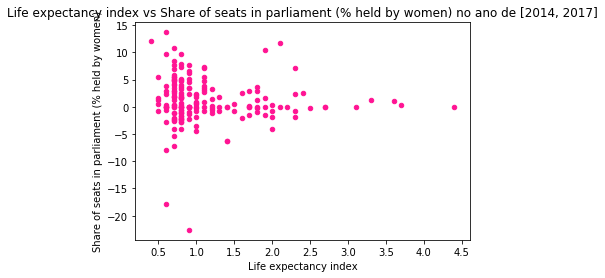

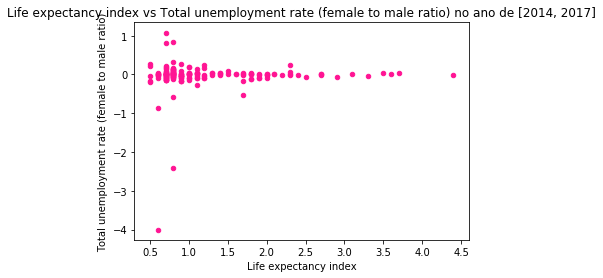

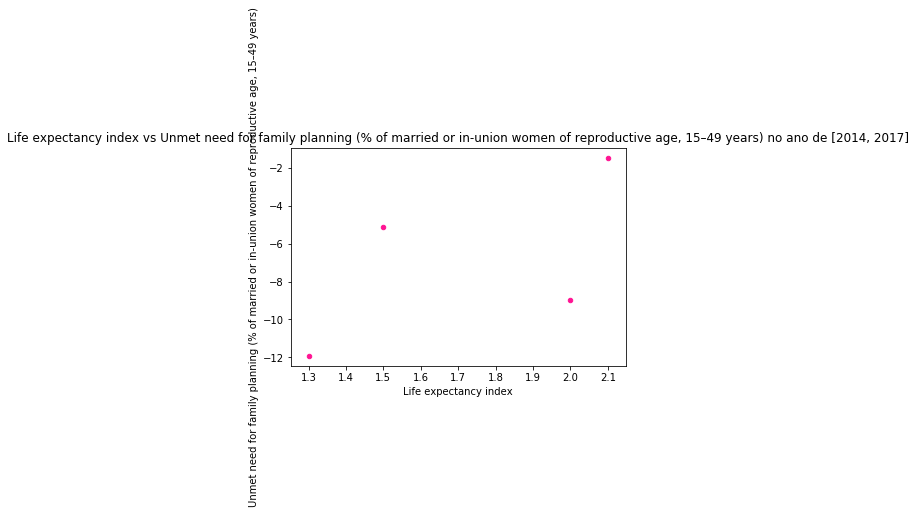

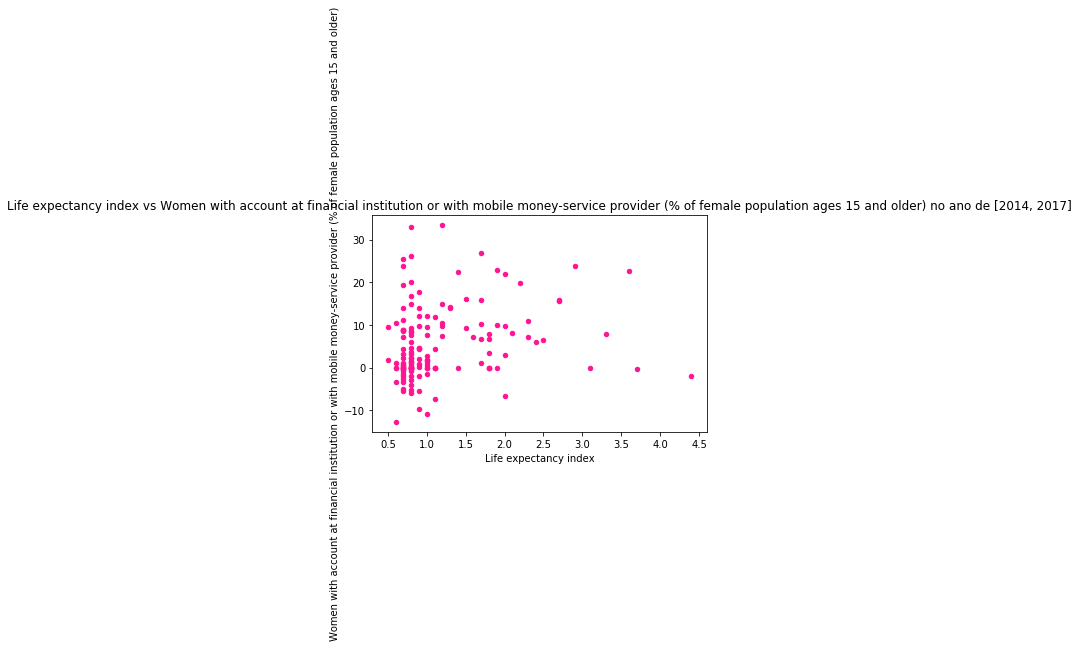

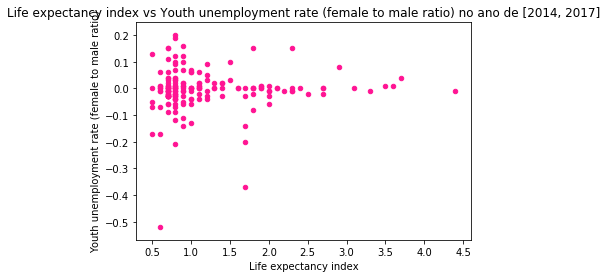

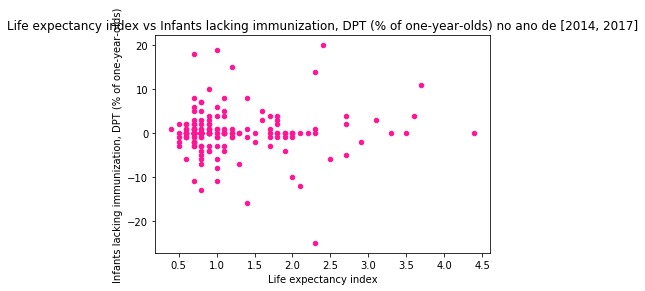

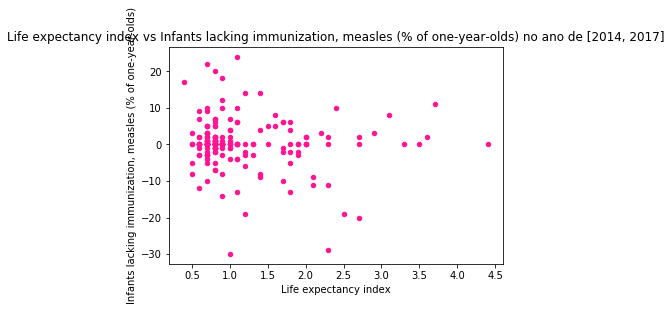

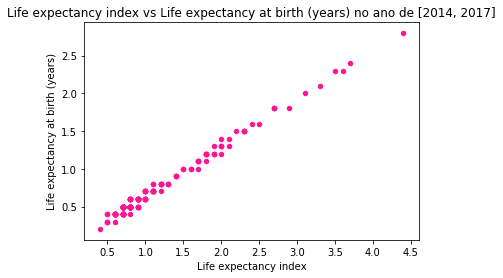

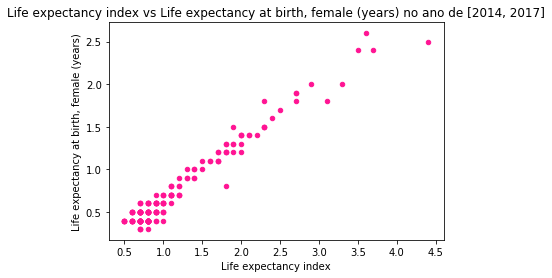

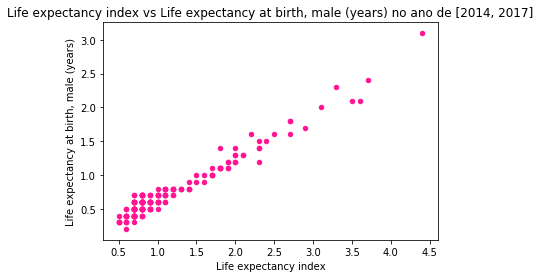

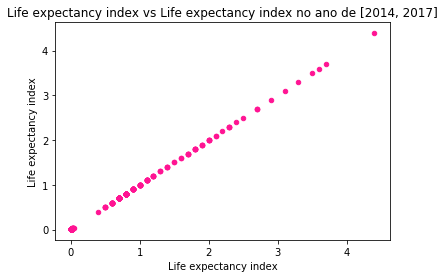

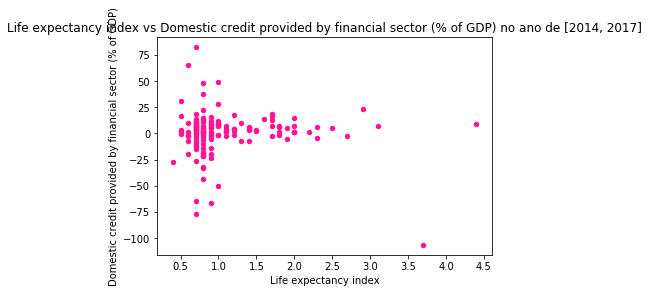

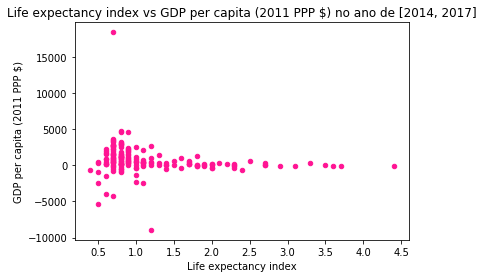

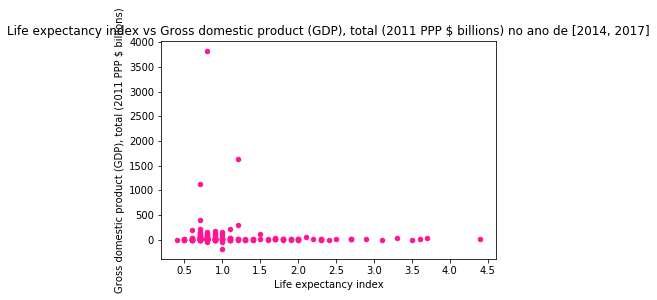

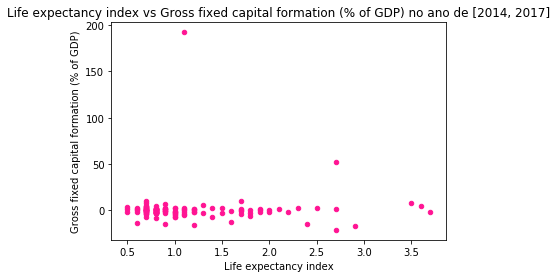

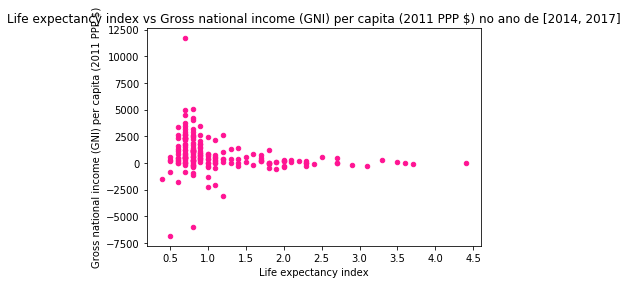

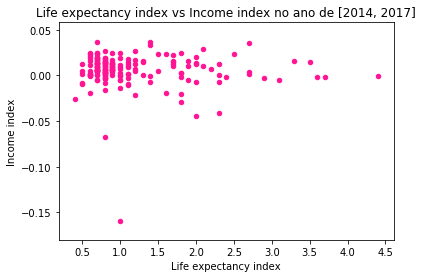

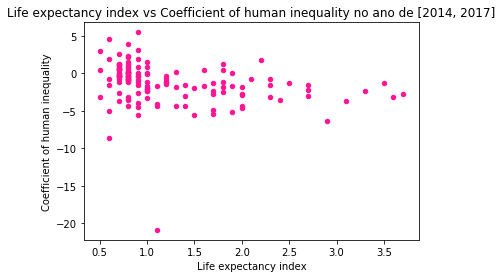

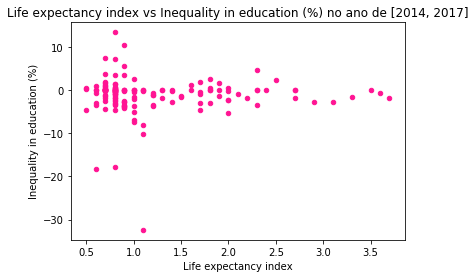

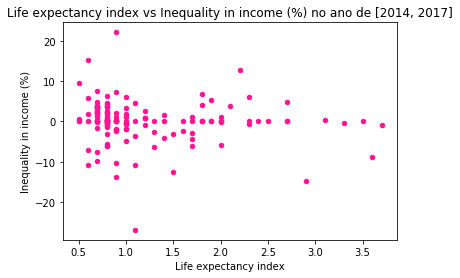

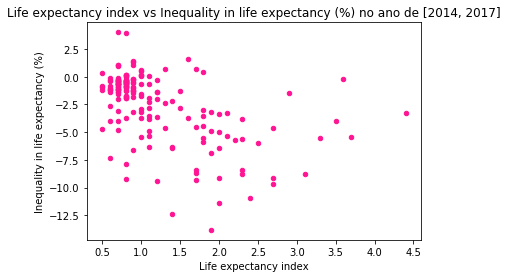

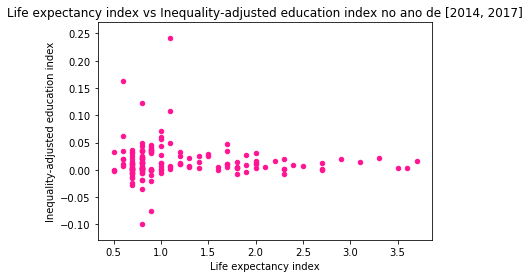

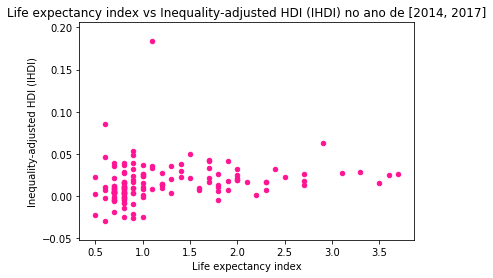

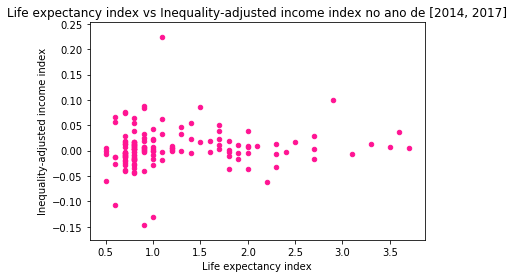

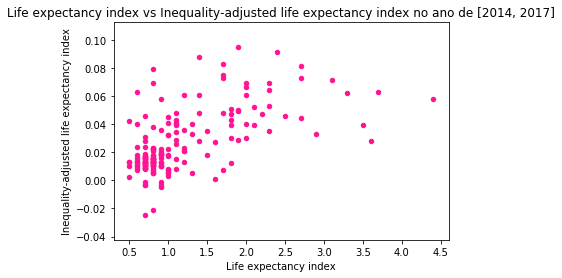

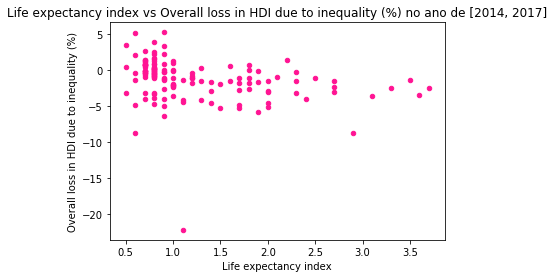

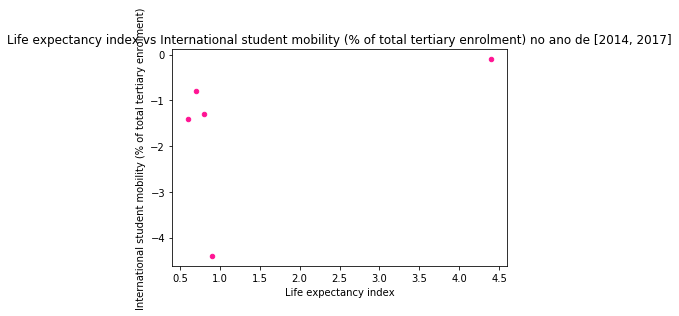

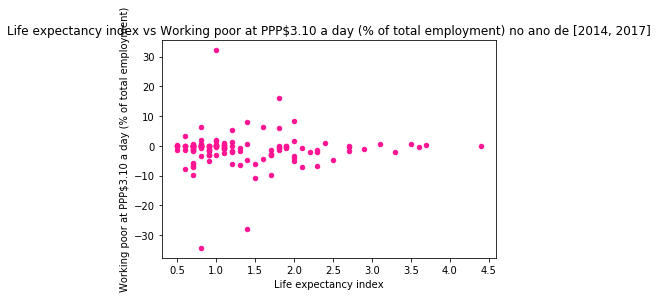

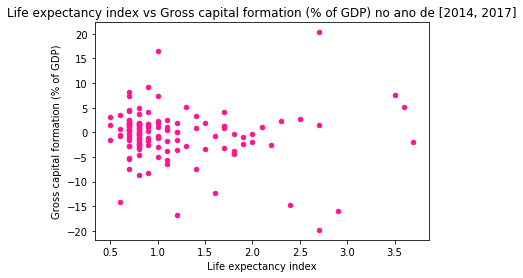

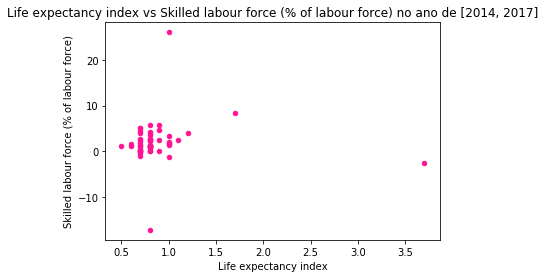

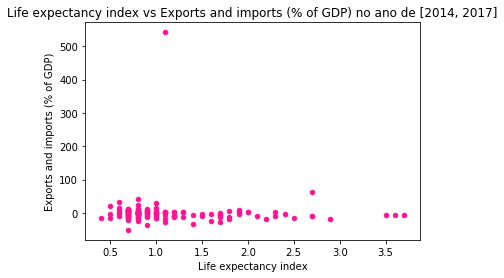

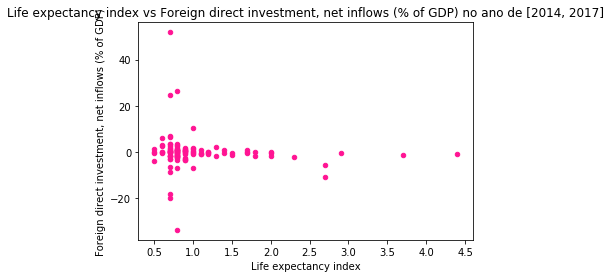

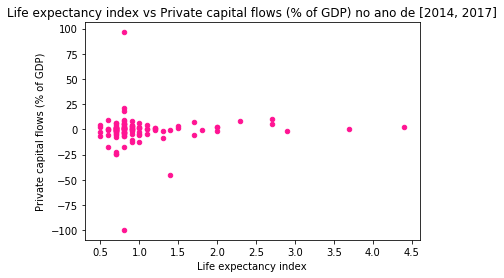

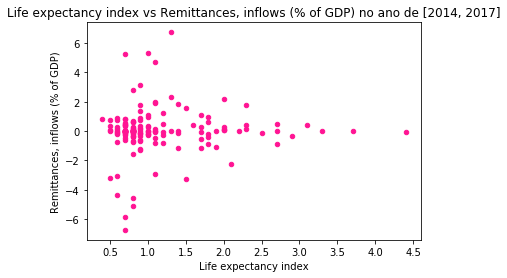

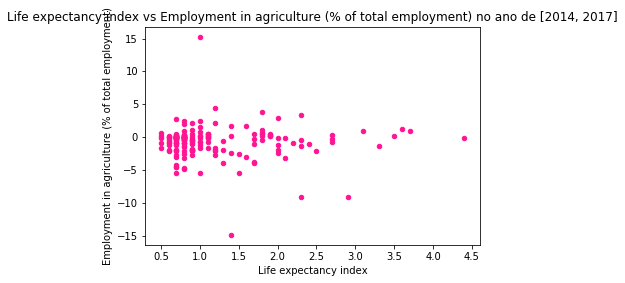

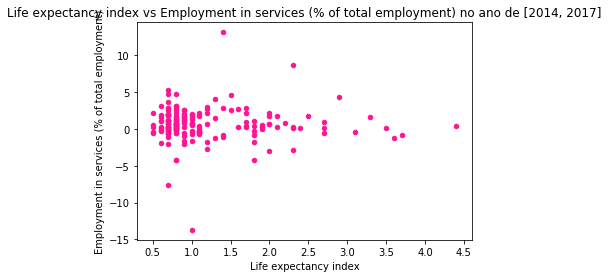

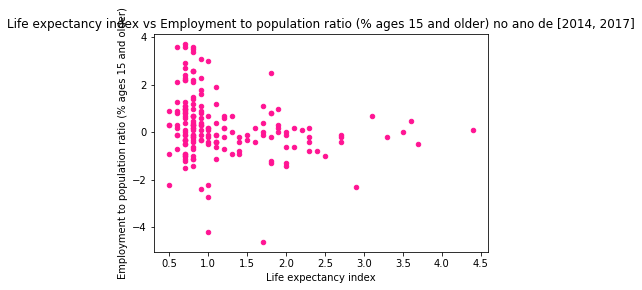

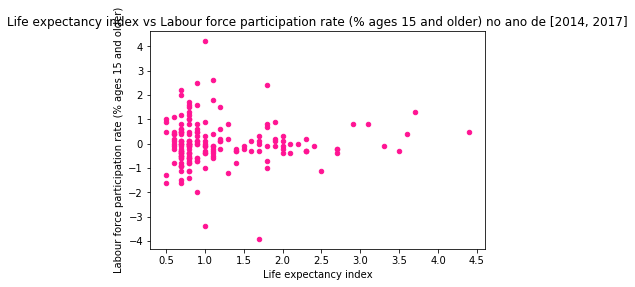

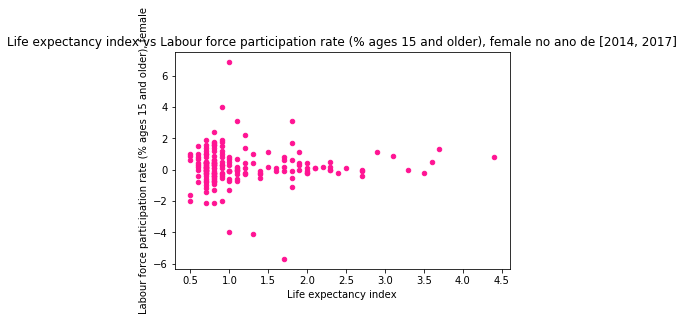

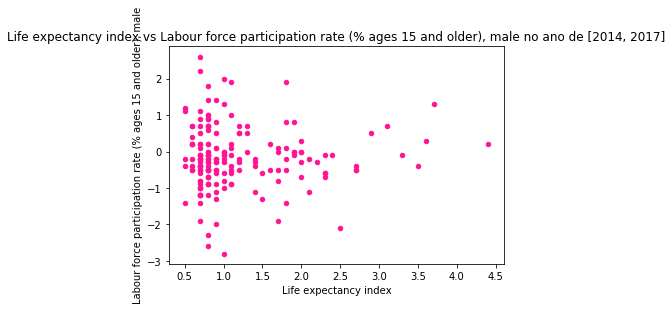

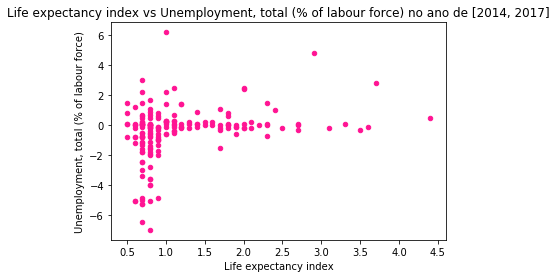

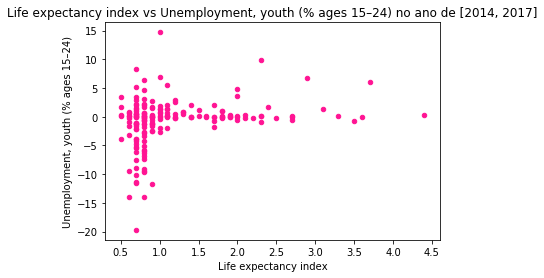

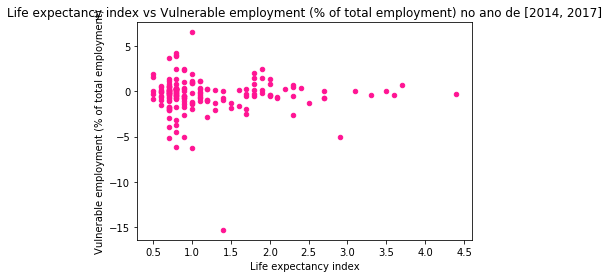

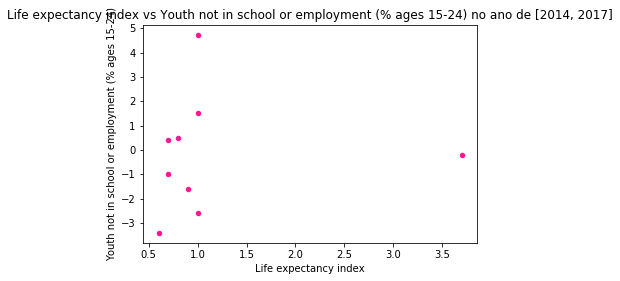

In [201]:
#agora será comparado uma categoria com todas as outras para detectar semelhanças
for categoria in df2['indicator_name'].unique():
    tabel = tracar_scatter_plot(df2, 'Life expectancy index',
       categoria, [2014 ,2017])

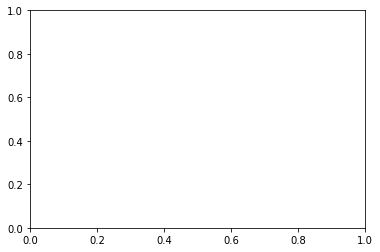

In [12]:
##criando outras funções para comparar o desempenho dos países em relação ano-a-ano

#criando uma função para separar a tabela por categoria escolhida
def tabelar_por_categoria(tabela_principal, indicador, paises_desejados):
    tabela_aux = tabela_principal[tabela_principal["indicator_name"] == indicador]
    tabela_final = tabela_aux[tabela_aux["country_name"].isin(paises_desejados)].copy(deep = True)
    return tabela_final

fig, ax = plt.subplots()
def calcular_index(tabela, coluna):
    new_index = tabela[coluna]
    return tabela.rename(new_index)
#criando uma função para plotar essa nova tabela com a legenda e o nome nos eixos corretamente
def tracar_grafico(tabela, paises_desejados, colunas_desejadas, ax, index = False):
    if index:
        tabela = calcular_index(tabela,"country_name")
    for pais in paises_desejados:
        if pais in tabela.index:
            tabela.loc[tabela["country_name"] == pais, colunas_desejadas].T.plot(ax=ax)
    plt.xlabel("Ano")
    plt.ylabel(tabela["indicator_name"][0])
    plt.show()
None

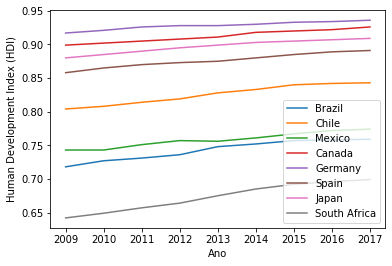

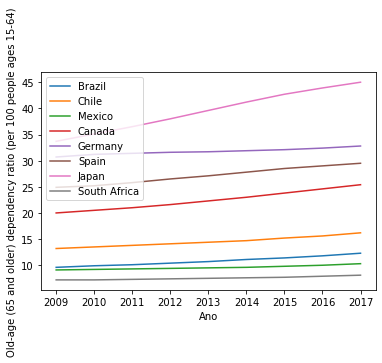

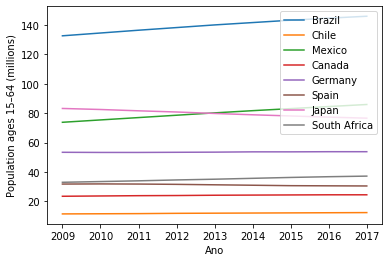

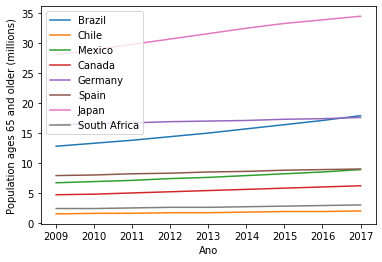

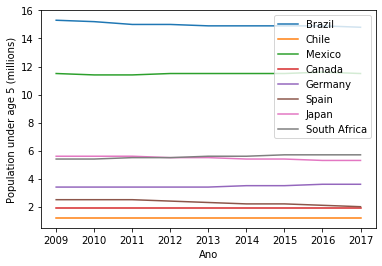

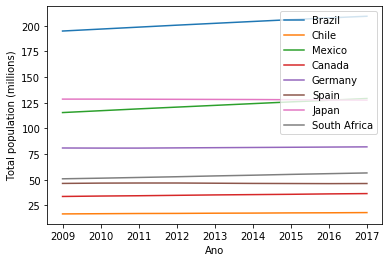

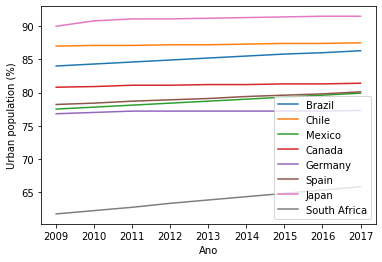

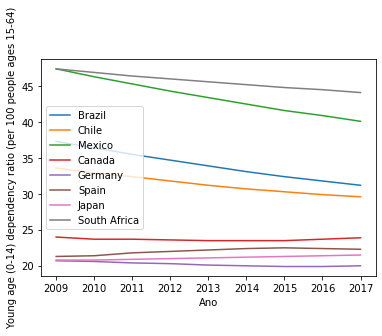

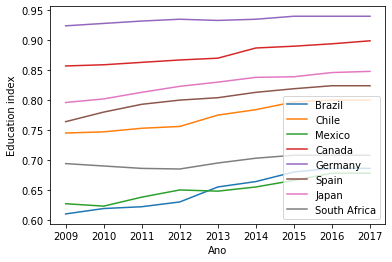

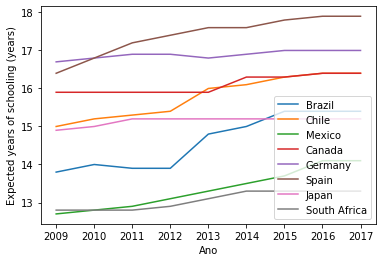

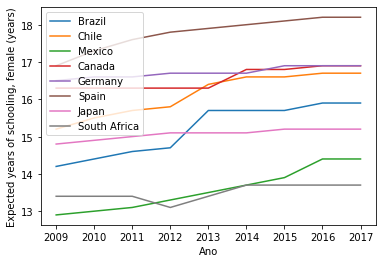

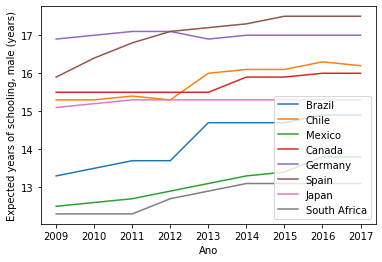

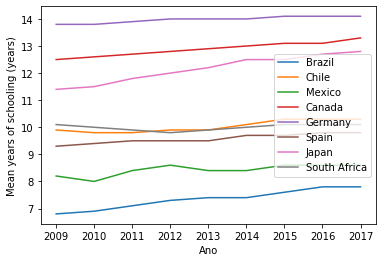

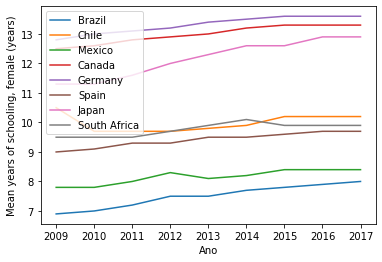

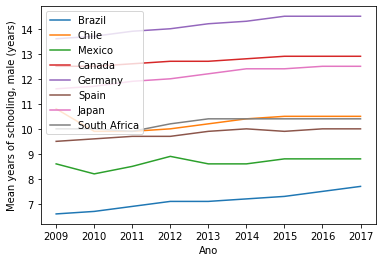

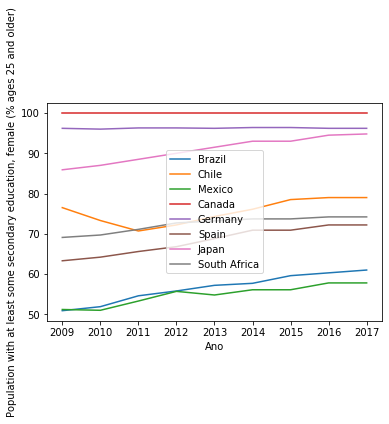

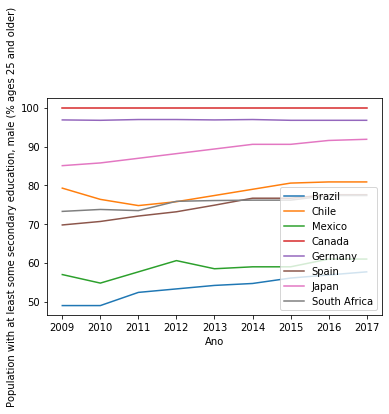

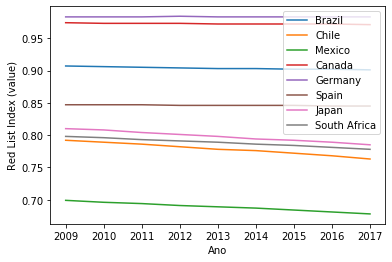

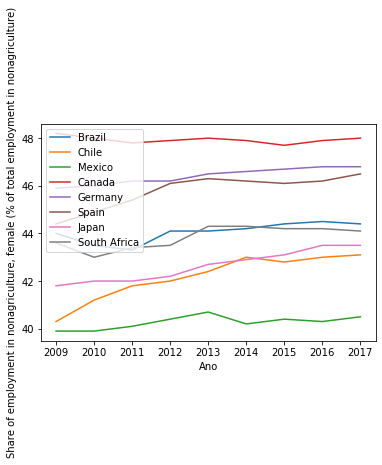

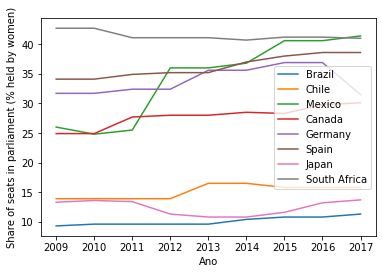

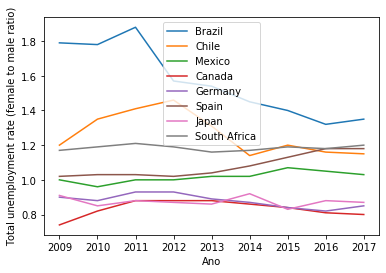

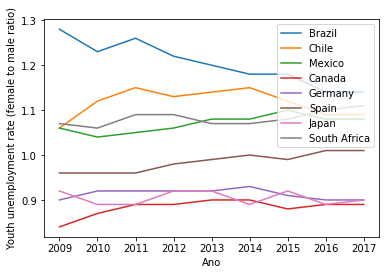

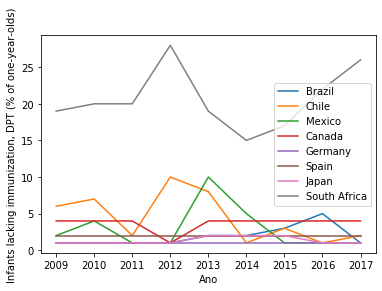

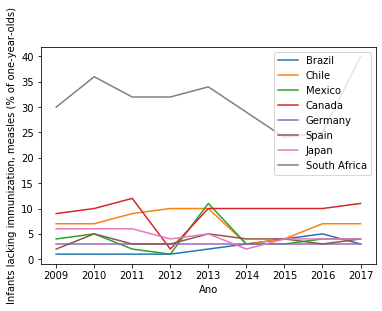

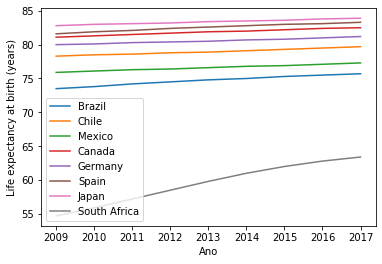

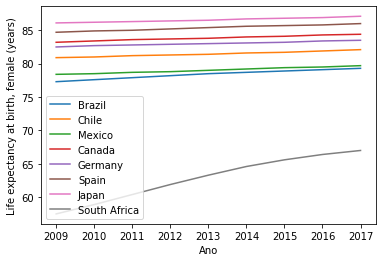

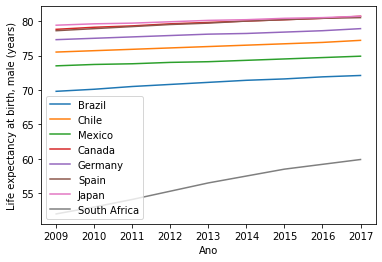

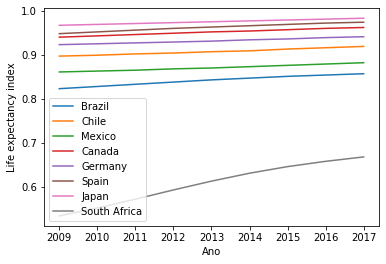

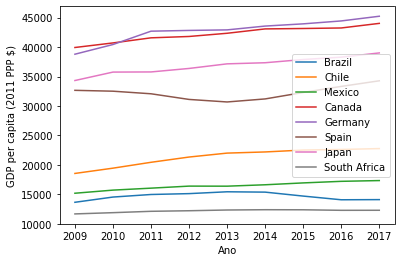

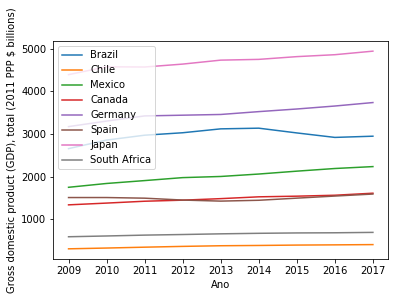

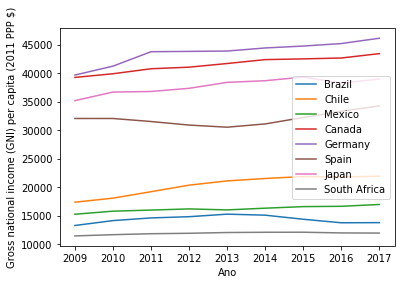

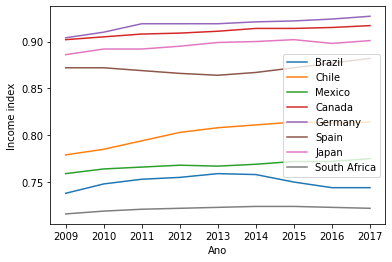

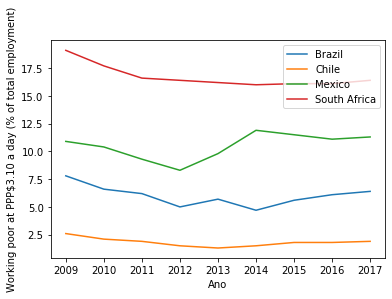

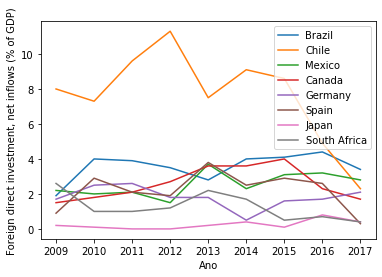

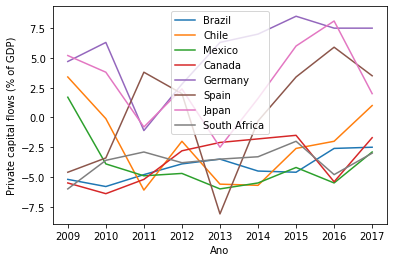

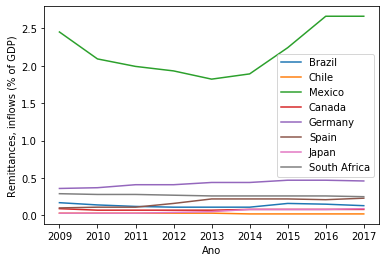

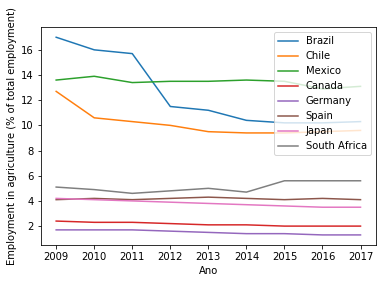

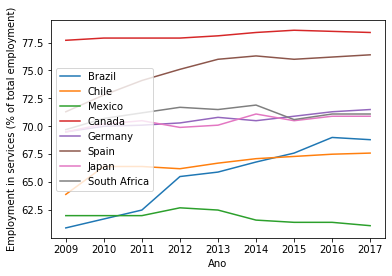

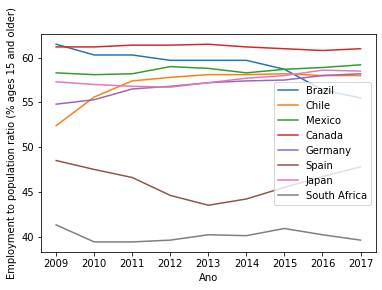

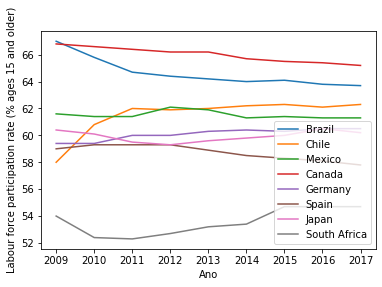

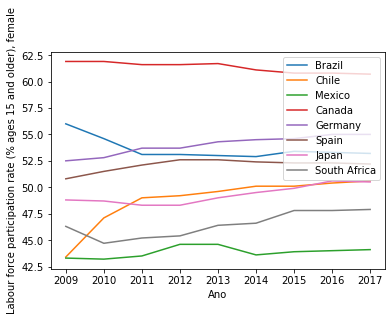

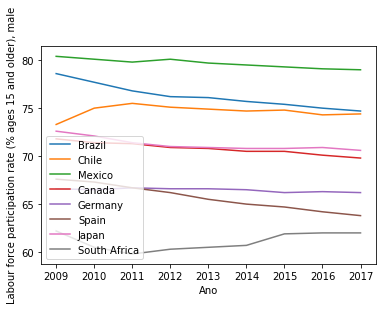

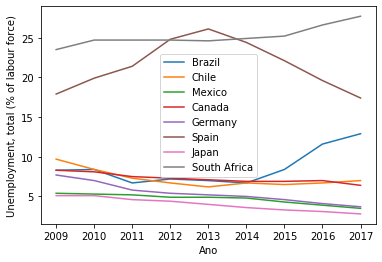

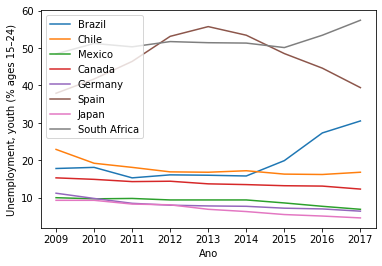

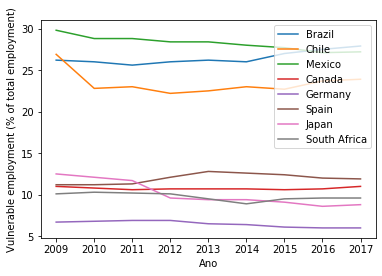

In [14]:
#utilizando todos os indicadores para ver se há alguma relação relevante, excluindo as tabelas com valores nulos
paises_desejados = ['Brazil', 'Chile', 'Mexico', 'Canada', 'Germany', 'Spain', 'Japan', 'South Africa']
colunas_desejadas = [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
categorias_escolhidas = df2["indicator_name"].unique()
for categoria in categorias_escolhidas:
    tabela = tabelar_por_categoria(df2, categoria, paises_desejados)
    if not tabela.isnull().any().any() and len(tabela.index) != 0:
        fig, ax = plt.subplots()
        tracar_grafico(tabela, paises_desejados, colunas_desejadas, ax, index = True)

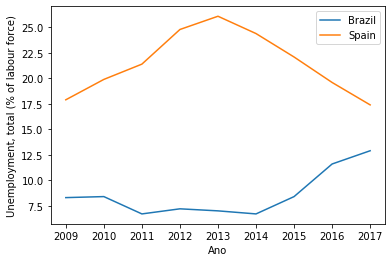

dimension  \
24985  Work, employment and vulnerability   
25113  Work, employment and vulnerability   

                                indicator_name country_name  2009  2010  2011  \
24985  Unemployment, total (% of labour force)       Brazil   8.3   8.4   6.7   
25113  Unemployment, total (% of labour force)        Spain  17.9  19.9  21.4   

       2012  2013  2014  2015  2016  2017  
24985   7.2   7.0   6.7   8.4  11.6  12.9  
25113  24.8  26.1  24.4  22.1  19.6  17.4

In [16]:
#comparando Espanha com Brasil
tabelaf = tabelar_por_categoria(df2, 'Unemployment, total (% of labour force)', ['Spain', 'Brazil'])

if not tabelaf.isnull().any().any() and len(tabelaf.index) != 0:
    fig, ax = plt.subplots()
    tracar_grafico(tabelaf, paises_desejados, colunas_desejadas, ax, index = True)
    
tabelaf.head()

In [17]:
#comparando a porcentagem da população por idade
categorias_idade = ['Population ages 15–64 (millions)',
       'Population ages 65 and older (millions)',
       'Population under age 5 (millions)',
       'Total population (millions)']
#criando as tabelas por idade mais a tabela com a população total
tabela_idade = [tabelar_por_categoria(df2, categoria, paises_desejados) for categoria in categorias_idade]
#com as tabelas na mão, devemos calcular as porcentagens de cada categoria para 
#ter uma noção melhor da idade média dessas populações
anos_usados = [i for i in range(2009, 2018)]
tabela_idade_per = []
tabela_idade[3] = calcular_index(tabela_idade[3],"country_name")
for tabela in tabela_idade:
    tabela = calcular_index(tabela,"country_name")
    tabela[anos_usados] = tabela[anos_usados]/tabela_idade[3][anos_usados]
    tabela_idade_per.append(tabela)
tabela_idade_per[0]["indicator_name"] = 'Population ages 15–64 (%)'
tabela_idade_per[1]["indicator_name"] = 'Population ages 65 and older (%)'
tabela_idade_per[2]["indicator_name"] = 'Population under age 5 (%)'


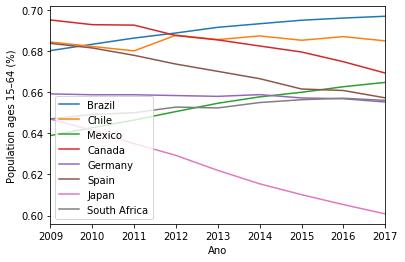

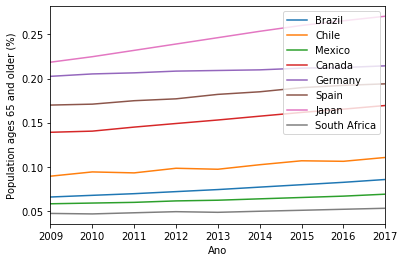

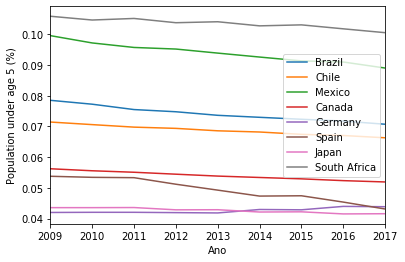

In [206]:
#traçando esses novos gráficos, com as novas categorias:
categorias_idade_novas = ['Population ages 15–64 (%)',
       'Population ages 65 and older (%)',
       'Population under age 5 (%)']
for k,categoria in enumerate(categorias_idade_novas):
    fig, ax = plt.subplots()
    tracar_grafico(tabela_idade_per[k], paises_desejados, colunas_desejadas, ax, index = True)

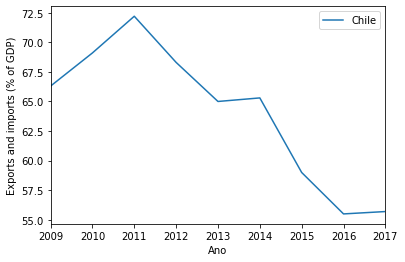

dimension                  indicator_name country_name  \
22776  Trade and financial flows  Exports and imports (% of GDP)        Chile   

       2009  2010  2011  2012  2013  2014  2015  2016  2017  
22776  66.3  69.1  72.2  68.3  65.0  65.3  59.0  55.5  55.7

In [207]:
#Pegando dados do Chile
tabelaf = tabelar_por_categoria(df2, 'Exports and imports (% of GDP)', ['Chile'])

if not tabelaf.isnull().any().any() and len(tabelaf.index) != 0:
    fig, ax = plt.subplots()
    tracar_grafico(tabelaf, paises_desejados, colunas_desejadas, ax, index = True)
    
tabelaf